# Karim Ayman 156422 (SUPPORT2 Dataset)

### Importing the dataset

In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [4]:
def drop_Outliers(x):
    q1 = kdata.iloc[:,x].quantile(0.25)
    q3 = kdata.iloc[:,x].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    kdata.iloc[:,x] = kdata.iloc[:,x].where((kdata.iloc[:,x] >= lower_bound) & (kdata.iloc[:,x] <= upper_bound))

### Merging the two dataframes X & y into kdata

In [5]:
kdata = pd.merge(X, y, left_index=True, right_index=True)

In [6]:
kdata

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000,0,0,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up


In [7]:
kdata.isna().sum()

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       1400
dtype: int64

In [8]:
kdata.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272,0.681054,0.259198
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763,0.466094,0.438219
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000,1.000000,1.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,1.000000


In [9]:
kdata.shape

(9105, 45)

## Now, there is too many null values in several columns. We will go through steps to deal with them.

### Step 1: Fill null values based on the recommendations on the website.

In [10]:
kdata.dtypes

age         float64
sex          object
dzgroup      object
dzclass      object
num.co        int64
edu         float64
income       object
scoma       float64
charges     float64
totcst      float64
totmcst     float64
avtisst     float64
race         object
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca           object
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
glucose     float64
bun         float64
urine       float64
adlp        float64
adls        float64
adlsc       float64
death         int64
hospdead      int64
sfdm2        object
dtype: object

In [11]:
kdata['alb'].fillna(3.5, inplace=True)
kdata['pafi'].fillna(333.3, inplace=True)
kdata['bili'].fillna(1.01, inplace=True)
kdata['crea'].fillna(1.01, inplace=True)
kdata['bun'].fillna(6.51, inplace=True)
kdata['wblc'].fillna(9, inplace=True)
kdata['urine'].fillna(2502, inplace=True)

In [12]:
kdata.isna().sum()

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc           0
hrt            1
resp           1
temp           1
pafi           0
alb            0
bili           0
crea           0
sod            1
ph          2284
glucose     4500
bun            0
urine          0
adlp        5641
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       1400
dtype: int64

### Still 10 columns have too many null values which are 'edu', 'income', 'totmcst', 'prg2m', 'prg6m', 'ph', 'glucose', 'adlp', 'adls' and 'sfdm2'.
### Step 2: We will discover if there is a relationship between 'edu' and 'income' and see if we resolve their nulls.

In [13]:
kdata['income'].unique()
kdata['income'].fillna('NA', inplace=True)

<AxesSubplot:xlabel='income'>

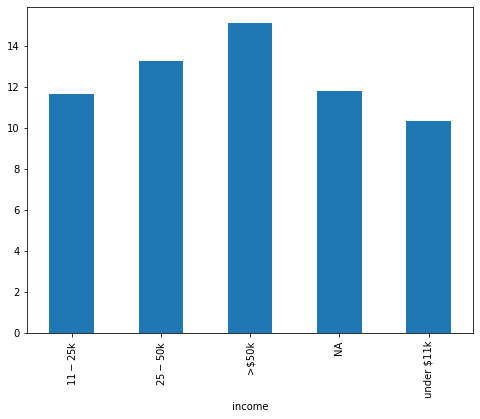

In [14]:
group1 = kdata.groupby('income')['edu'].mean()
group1.plot(kind='bar', figsize=(8,6))

### The above chart shows that people with income 'NA' which are the total nulls in the income column have the same average educational years as those with income between (11-25K). So, we will replace the null values in 'income' column with '11-25K'.

In [15]:
kdata['income'].unique()

array(['$11-$25k', 'under $11k', 'NA', '$25-$50k', '>$50k'], dtype=object)

In [16]:
kdata['income'].replace('NA', '$11-$25k', inplace=True)

In [17]:
kdata['income'].isna().sum()

0

In [18]:
kdata['edu'].unique()

array([11., 12., nan, 14., 16., 22.,  8., 13., 17., 19.,  0., 10., 21.,
        6., 18., 15.,  3., 20.,  2., 30.,  9.,  7., 27.,  1.,  4., 24.,
       23.,  5., 31., 25., 26., 28.])

In [19]:
kdata['income'].replace({'$11-$25k': 2, 'under $11k': 1, '$25-$50k': 3, '>$50k': 4}, inplace=True)

### As the chart also shows there is a direct relationship between 'edu' years and 'income', we will drop the 'edu' column after we had resolved the nulls of the 'income' column.

In [20]:
kdata.drop('edu', axis=1, inplace=True)

In [21]:
kdata['sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
kdata['sex'].replace({'male': 0, 'female': 1}, inplace=True)

### Step 3: We will drop the columns with almost 50% of the records or more are nulls. So, we will drop 'glucose'. In addition to dropping 'adlp' and 'totmcst' for their redundancy.

In [23]:
kdata.drop(['adlp', 'glucose', 'totmcst'], axis=1, inplace=True)

In [24]:
kdata['dzgroup'].unique()

array(['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object)

In [25]:
# Using Label Encoding to numeric the values.
dzgroup_enc = LabelEncoder()
dzgroup_new = dzgroup_enc.fit_transform(kdata['dzgroup'])

In [26]:
kdata['dzgroup'] = dzgroup_new

In [27]:
kdata['prg2m'].unique()

array([0.5       , 0.        , 0.75      , 0.89999962,        nan,
       0.79999971, 0.04999998, 0.69999981, 0.09999996, 0.59999991,
       1.        , 0.94999981, 0.98999977, 0.29999995, 0.19999993,
       0.25      , 0.84999991, 0.39999986, 0.64999962, 0.44999981,
       0.97999954, 0.01      , 0.02      , 0.14999998, 0.05999997,
       0.95999956, 0.06999999, 0.92999983, 0.08999997, 0.96999979,
       0.34999991, 0.54999971, 0.03999999, 0.9199996 , 0.77999973,
       0.82999992, 0.18999994, 0.90999985, 0.78999996, 0.75999975,
       0.76999998, 0.87999964, 0.32999992, 0.02999999, 0.52999973,
       0.6699996 , 0.36999989, 0.50999975, 0.48999977, 0.07999998,
       0.38999987, 0.23999989])

<AxesSubplot:xlabel='count', ylabel='prg2m'>

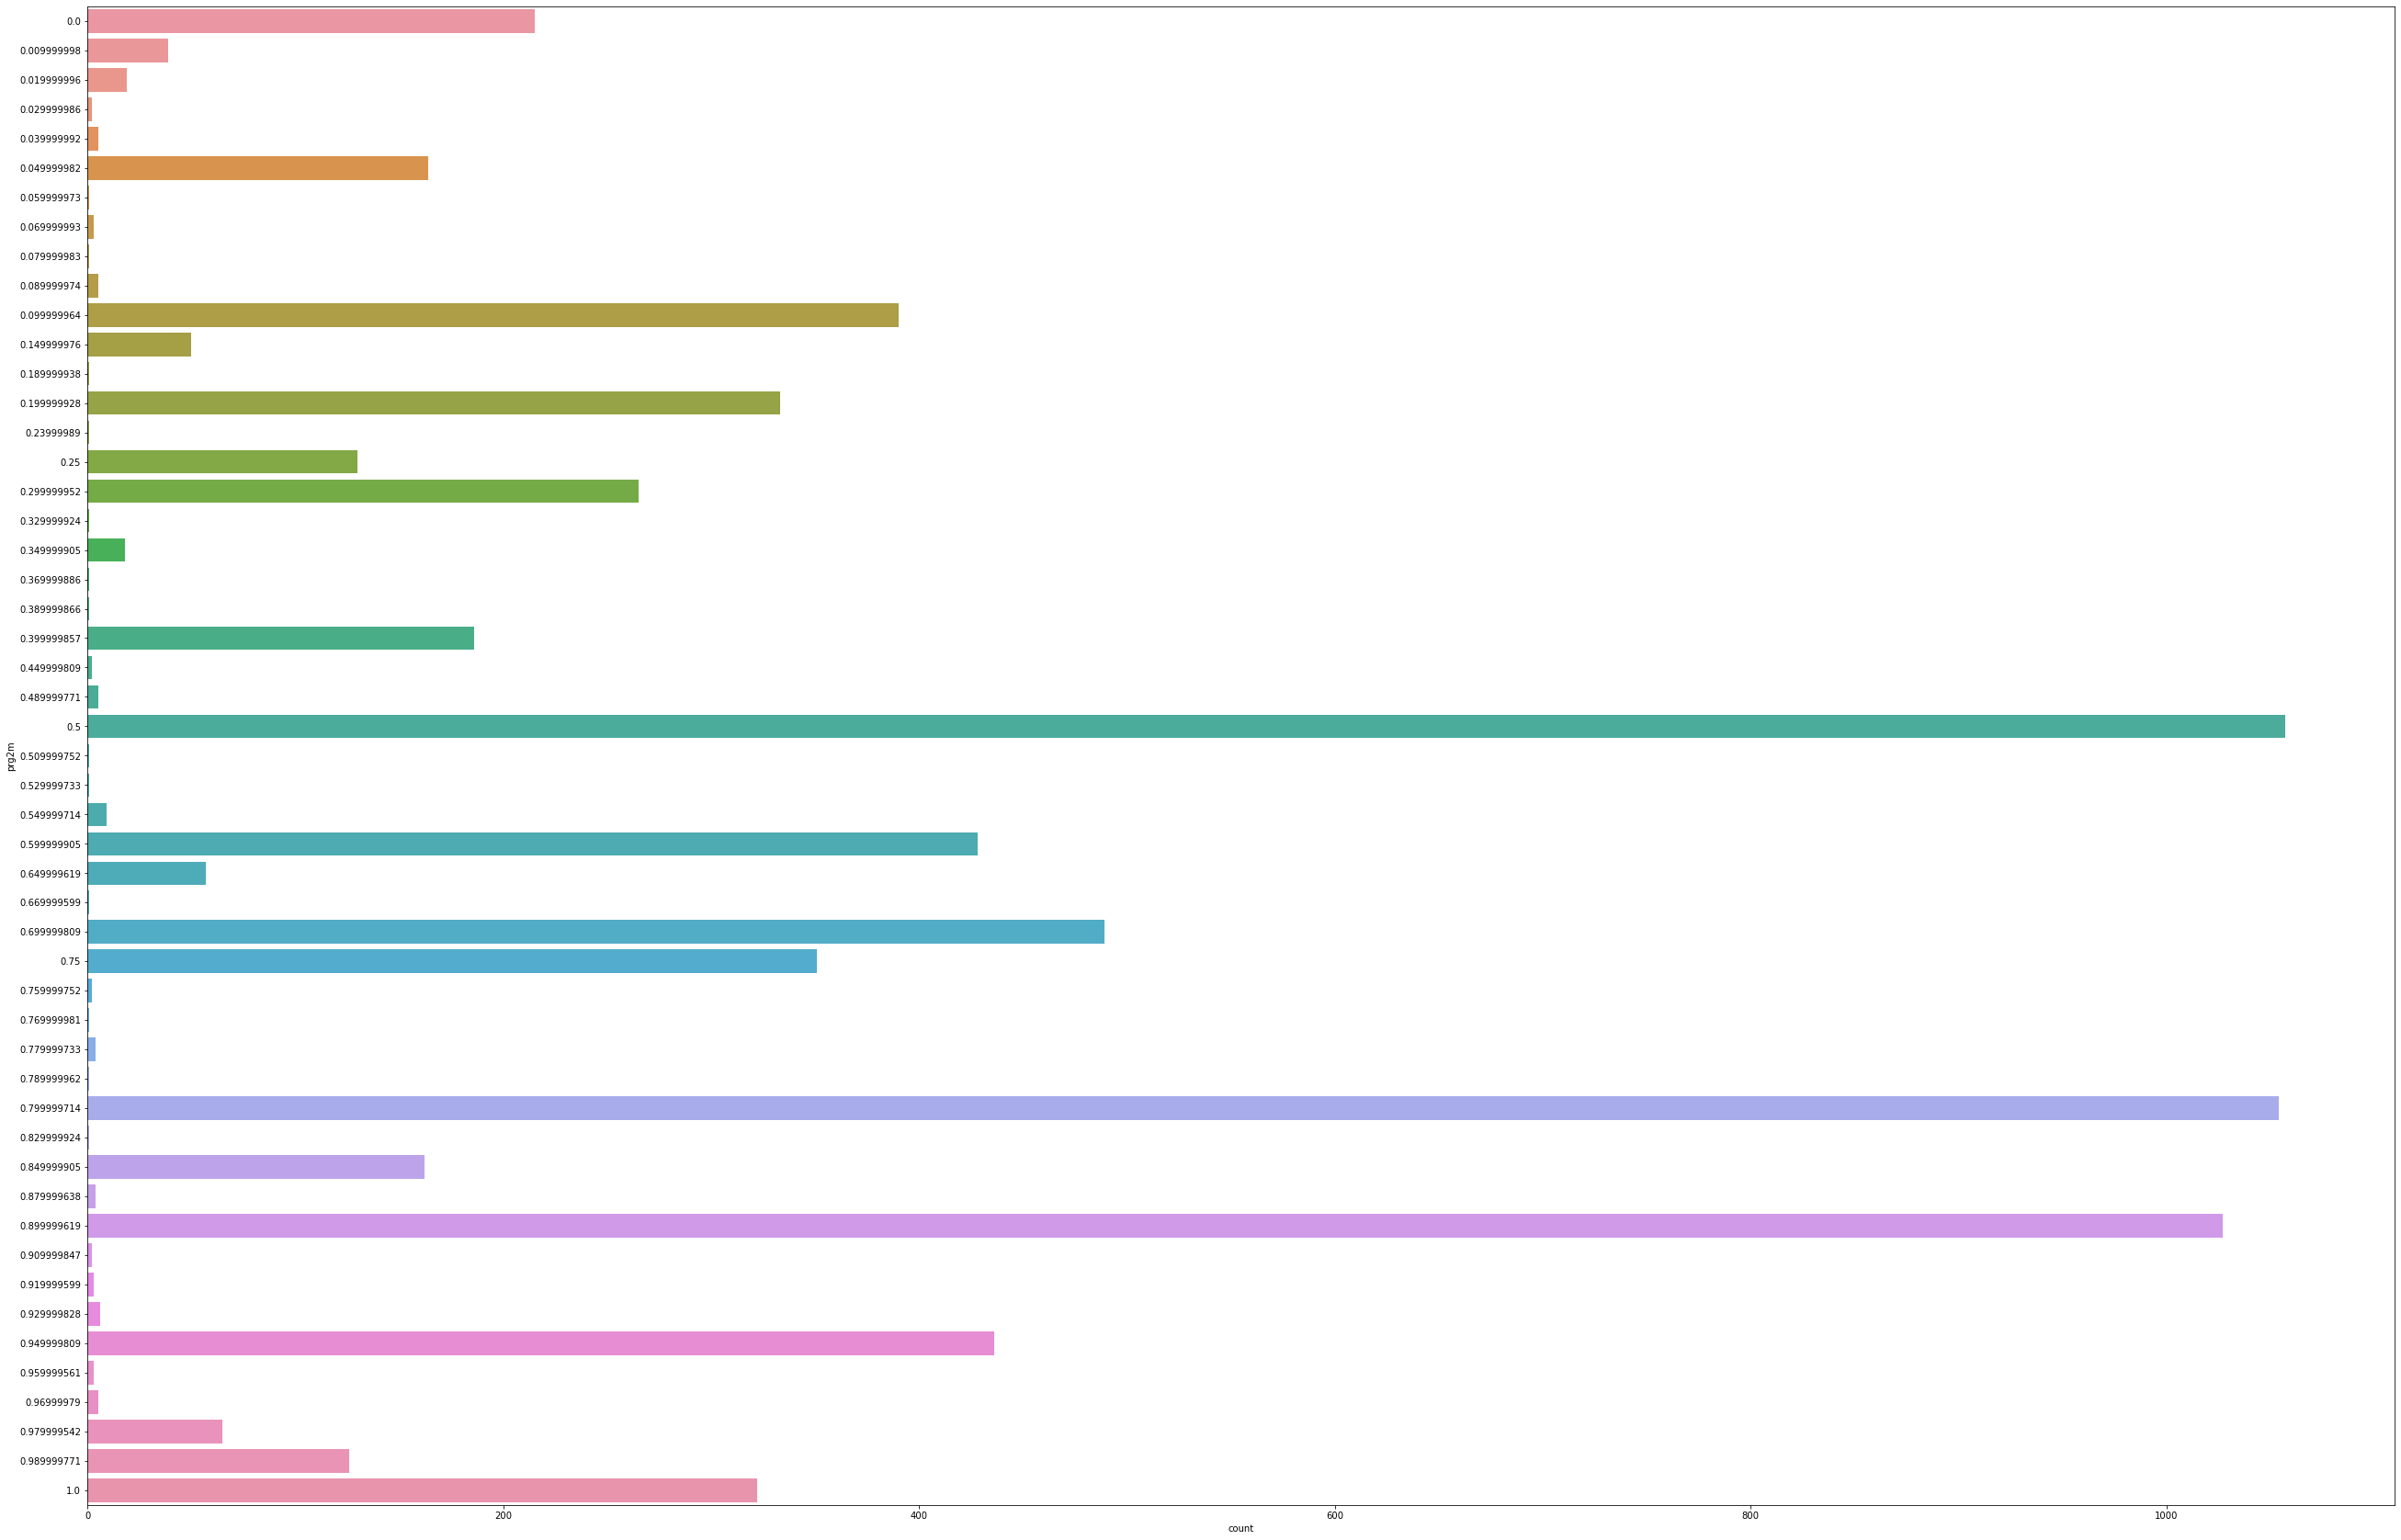

In [28]:
fig, _ = plt.subplots()
fig.set_size_inches(45,30)
sns.countplot(y='prg2m', data=kdata)

In [29]:
kdata['prg6m'].unique()

array([2.50e-01, 0.00e+00, 5.00e-01, 9.00e-01, 7.00e-01, 4.00e-01,
       1.25e-04,      nan, 1.00e-03, 1.25e-01, 1.00e+00, 1.00e-01,
       6.00e-01, 7.50e-01, 9.50e-01, 8.50e-01, 8.00e-01, 2.00e-01,
       5.00e-02, 8.00e-03, 8.57e-01, 6.14e-01, 3.00e-01, 1.50e-01,
       1.56e-02, 6.50e-01, 1.00e-06, 2.00e-02, 3.37e-03, 2.16e-01,
       9.80e-01, 3.50e-01, 9.90e-01, 2.16e-04, 9.20e-01, 3.43e-04,
       5.12e-01, 7.40e-01, 1.00e-02, 7.29e-04, 9.00e-02, 3.30e-01,
       6.80e-01, 3.43e-01, 6.00e-02, 4.00e-02, 9.30e-01, 5.50e-01,
       4.50e-01, 8.30e-01, 9.40e-01, 1.20e-01, 9.70e-01, 1.90e-01,
       9.10e-01, 8.00e-06, 2.80e-01, 6.40e-05, 8.00e-02, 9.41e-01,
       6.40e-02, 9.60e-01, 7.70e-01, 7.00e-02, 6.60e-01, 2.70e-01,
       7.29e-01, 8.80e-01, 7.80e-01, 8.70e-01, 1.80e-01, 8.20e-01,
       4.22e-01, 8.40e-01, 2.70e-02, 4.70e-01, 2.70e-05, 8.90e-01,
       3.00e-02, 5.80e-01, 2.30e-01, 5.10e-01, 6.10e-01, 3.90e-01,
       5.12e-04, 4.90e-01, 2.40e-01, 4.80e-01])

<AxesSubplot:xlabel='count', ylabel='prg6m'>

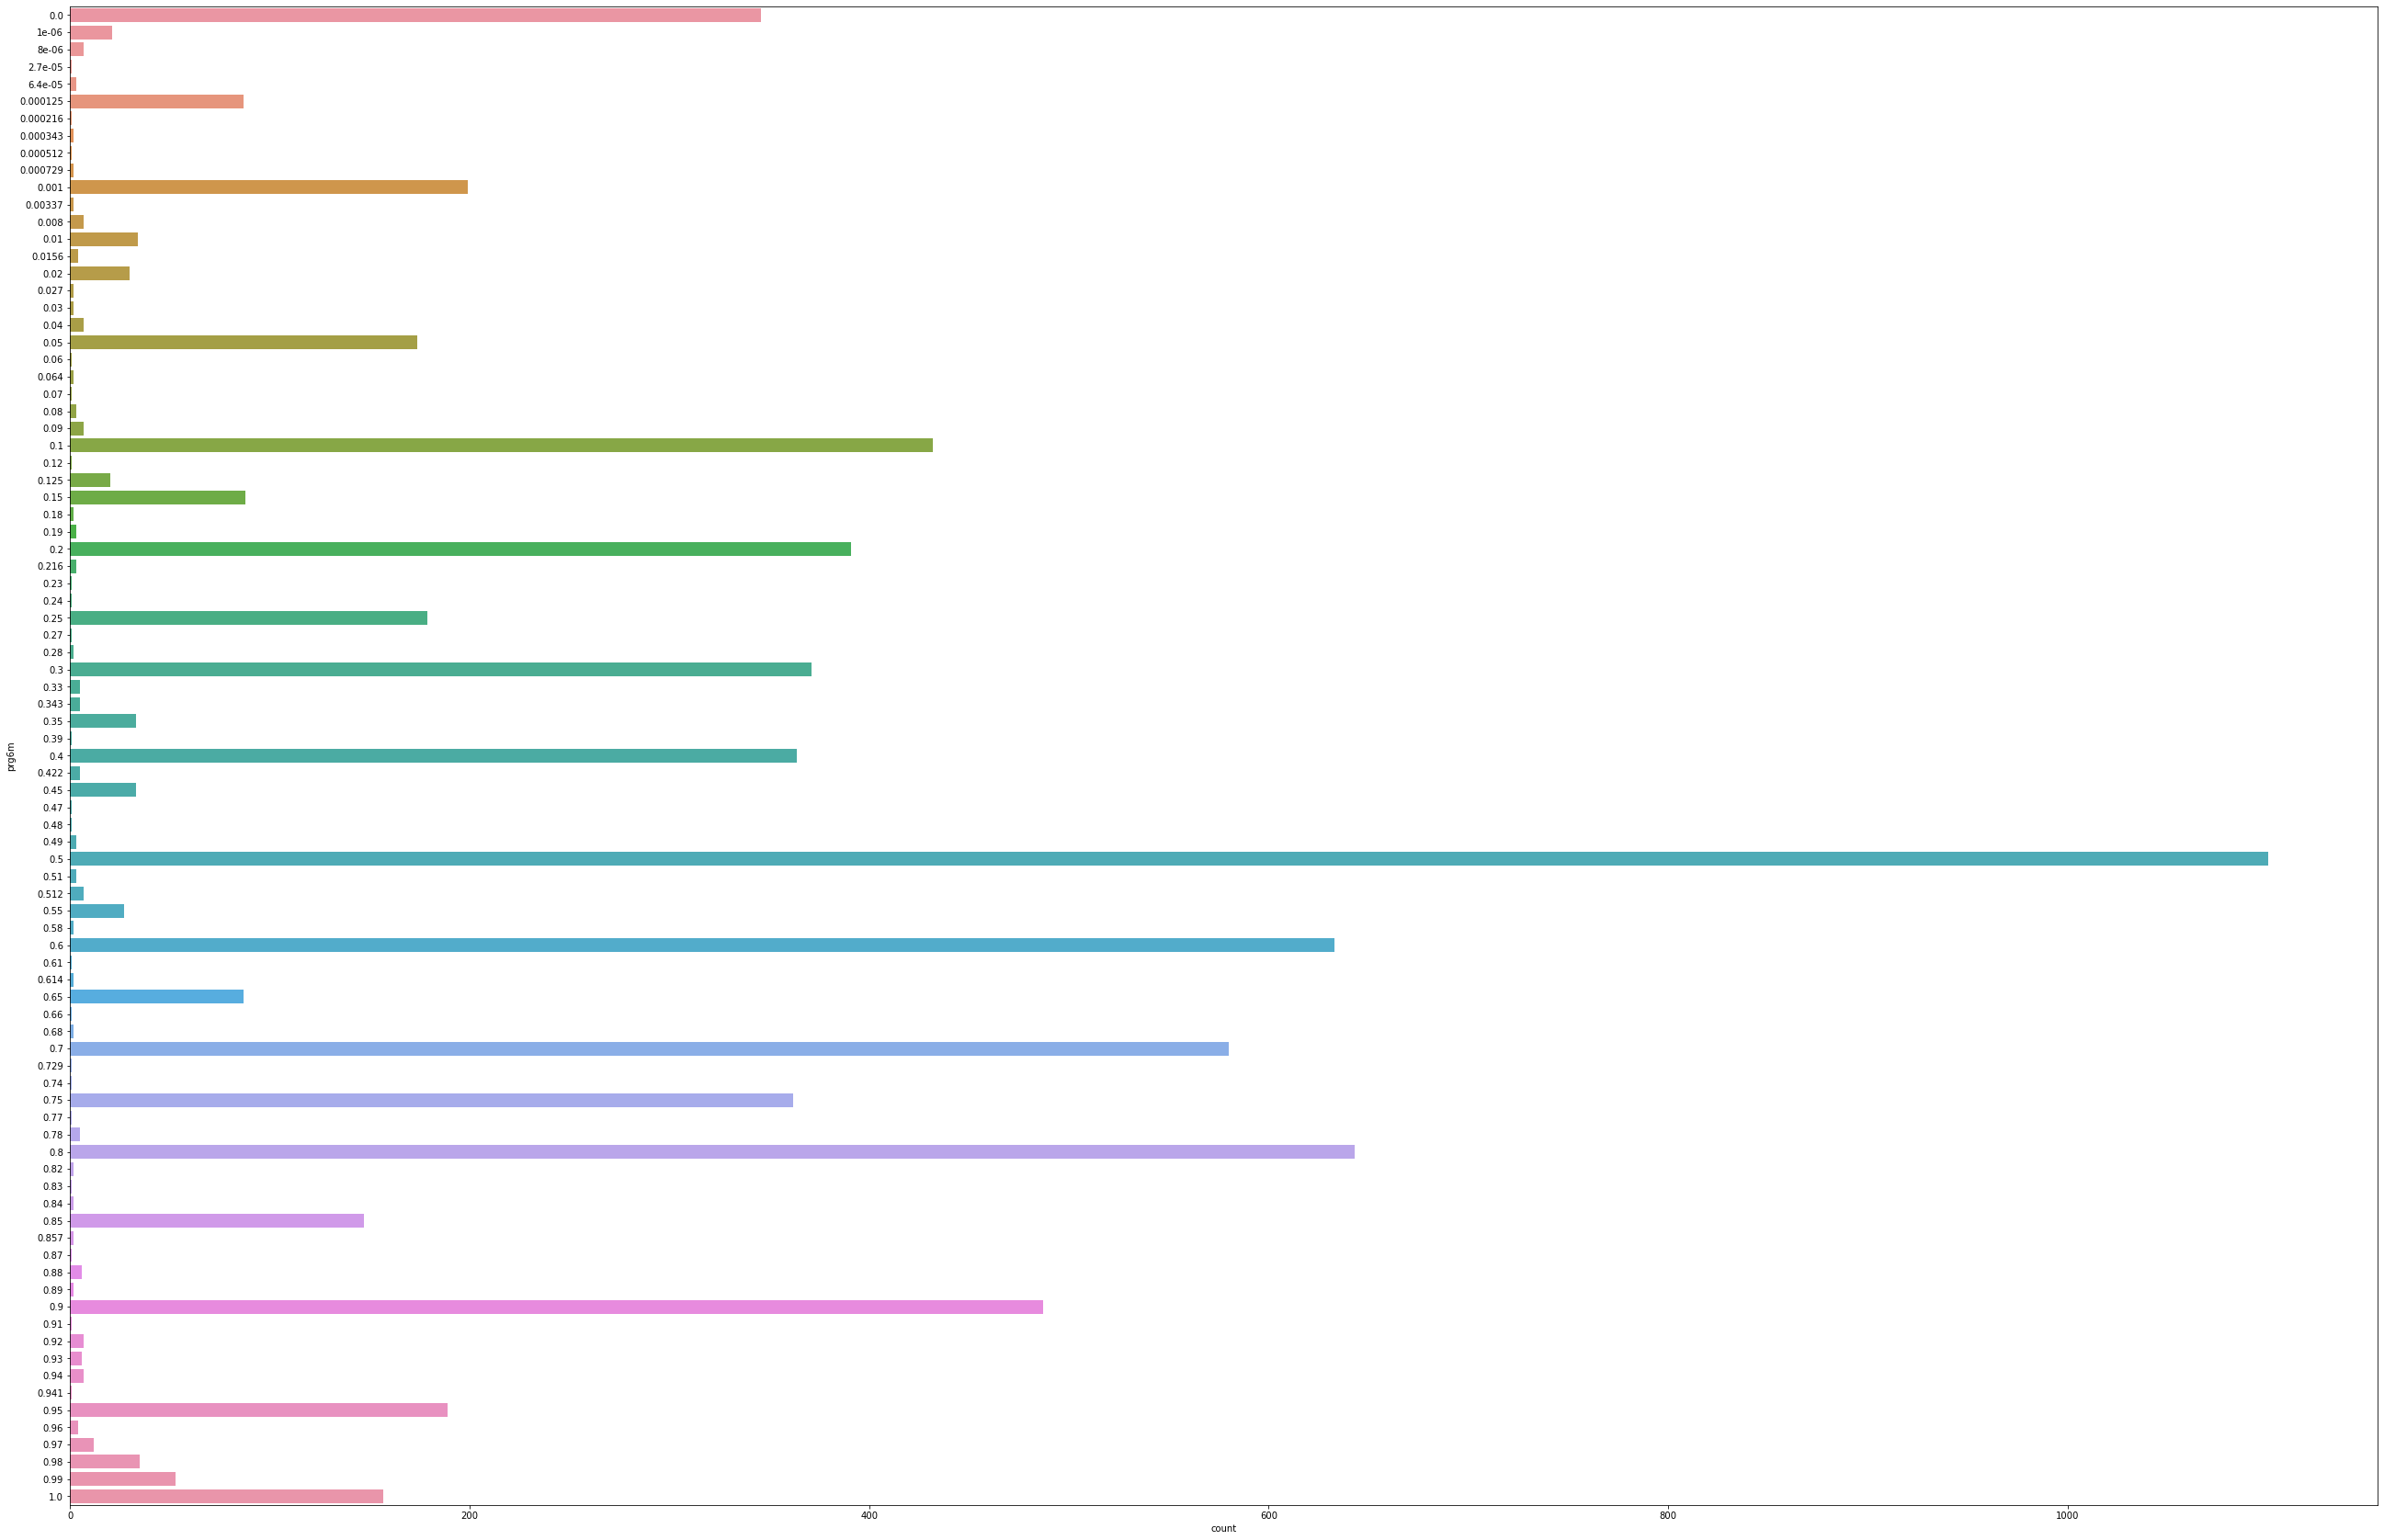

In [30]:
fig, _ = plt.subplots()
fig.set_size_inches(45,30)
sns.countplot(y='prg6m', data=kdata)

### Both the above features are the physician's expectations for patient's survival in 2 and 6 months respectively. They both have almost the same amount of nulls.

### Step 4: We will fill the nulls of each column with the mean value.

In [31]:
kdata.dtypes

age         float64
sex           int64
dzgroup       int32
dzclass      object
num.co        int64
income        int64
scoma       float64
charges     float64
totcst      float64
avtisst     float64
race         object
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca           object
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
bun         float64
urine       float64
adls        float64
adlsc       float64
death         int64
hospdead      int64
sfdm2        object
dtype: object

In [32]:
kdata['prg2m'].fillna(kdata['prg2m'].mean(), inplace=True)
kdata['prg6m'].fillna(kdata['prg6m'].mean(), inplace=True)

### Now, we are left with three heavy null columns: 'ph', 'adls' and 'sfdm2'.
### The implemented models will classify based on 'hospital death'. So, we will drop the other two target columns 'sfdm2' and 'death'.

In [33]:
kdata.drop(['sfdm2', 'death'], axis=1, inplace=True)

<AxesSubplot:xlabel='count', ylabel='ph'>

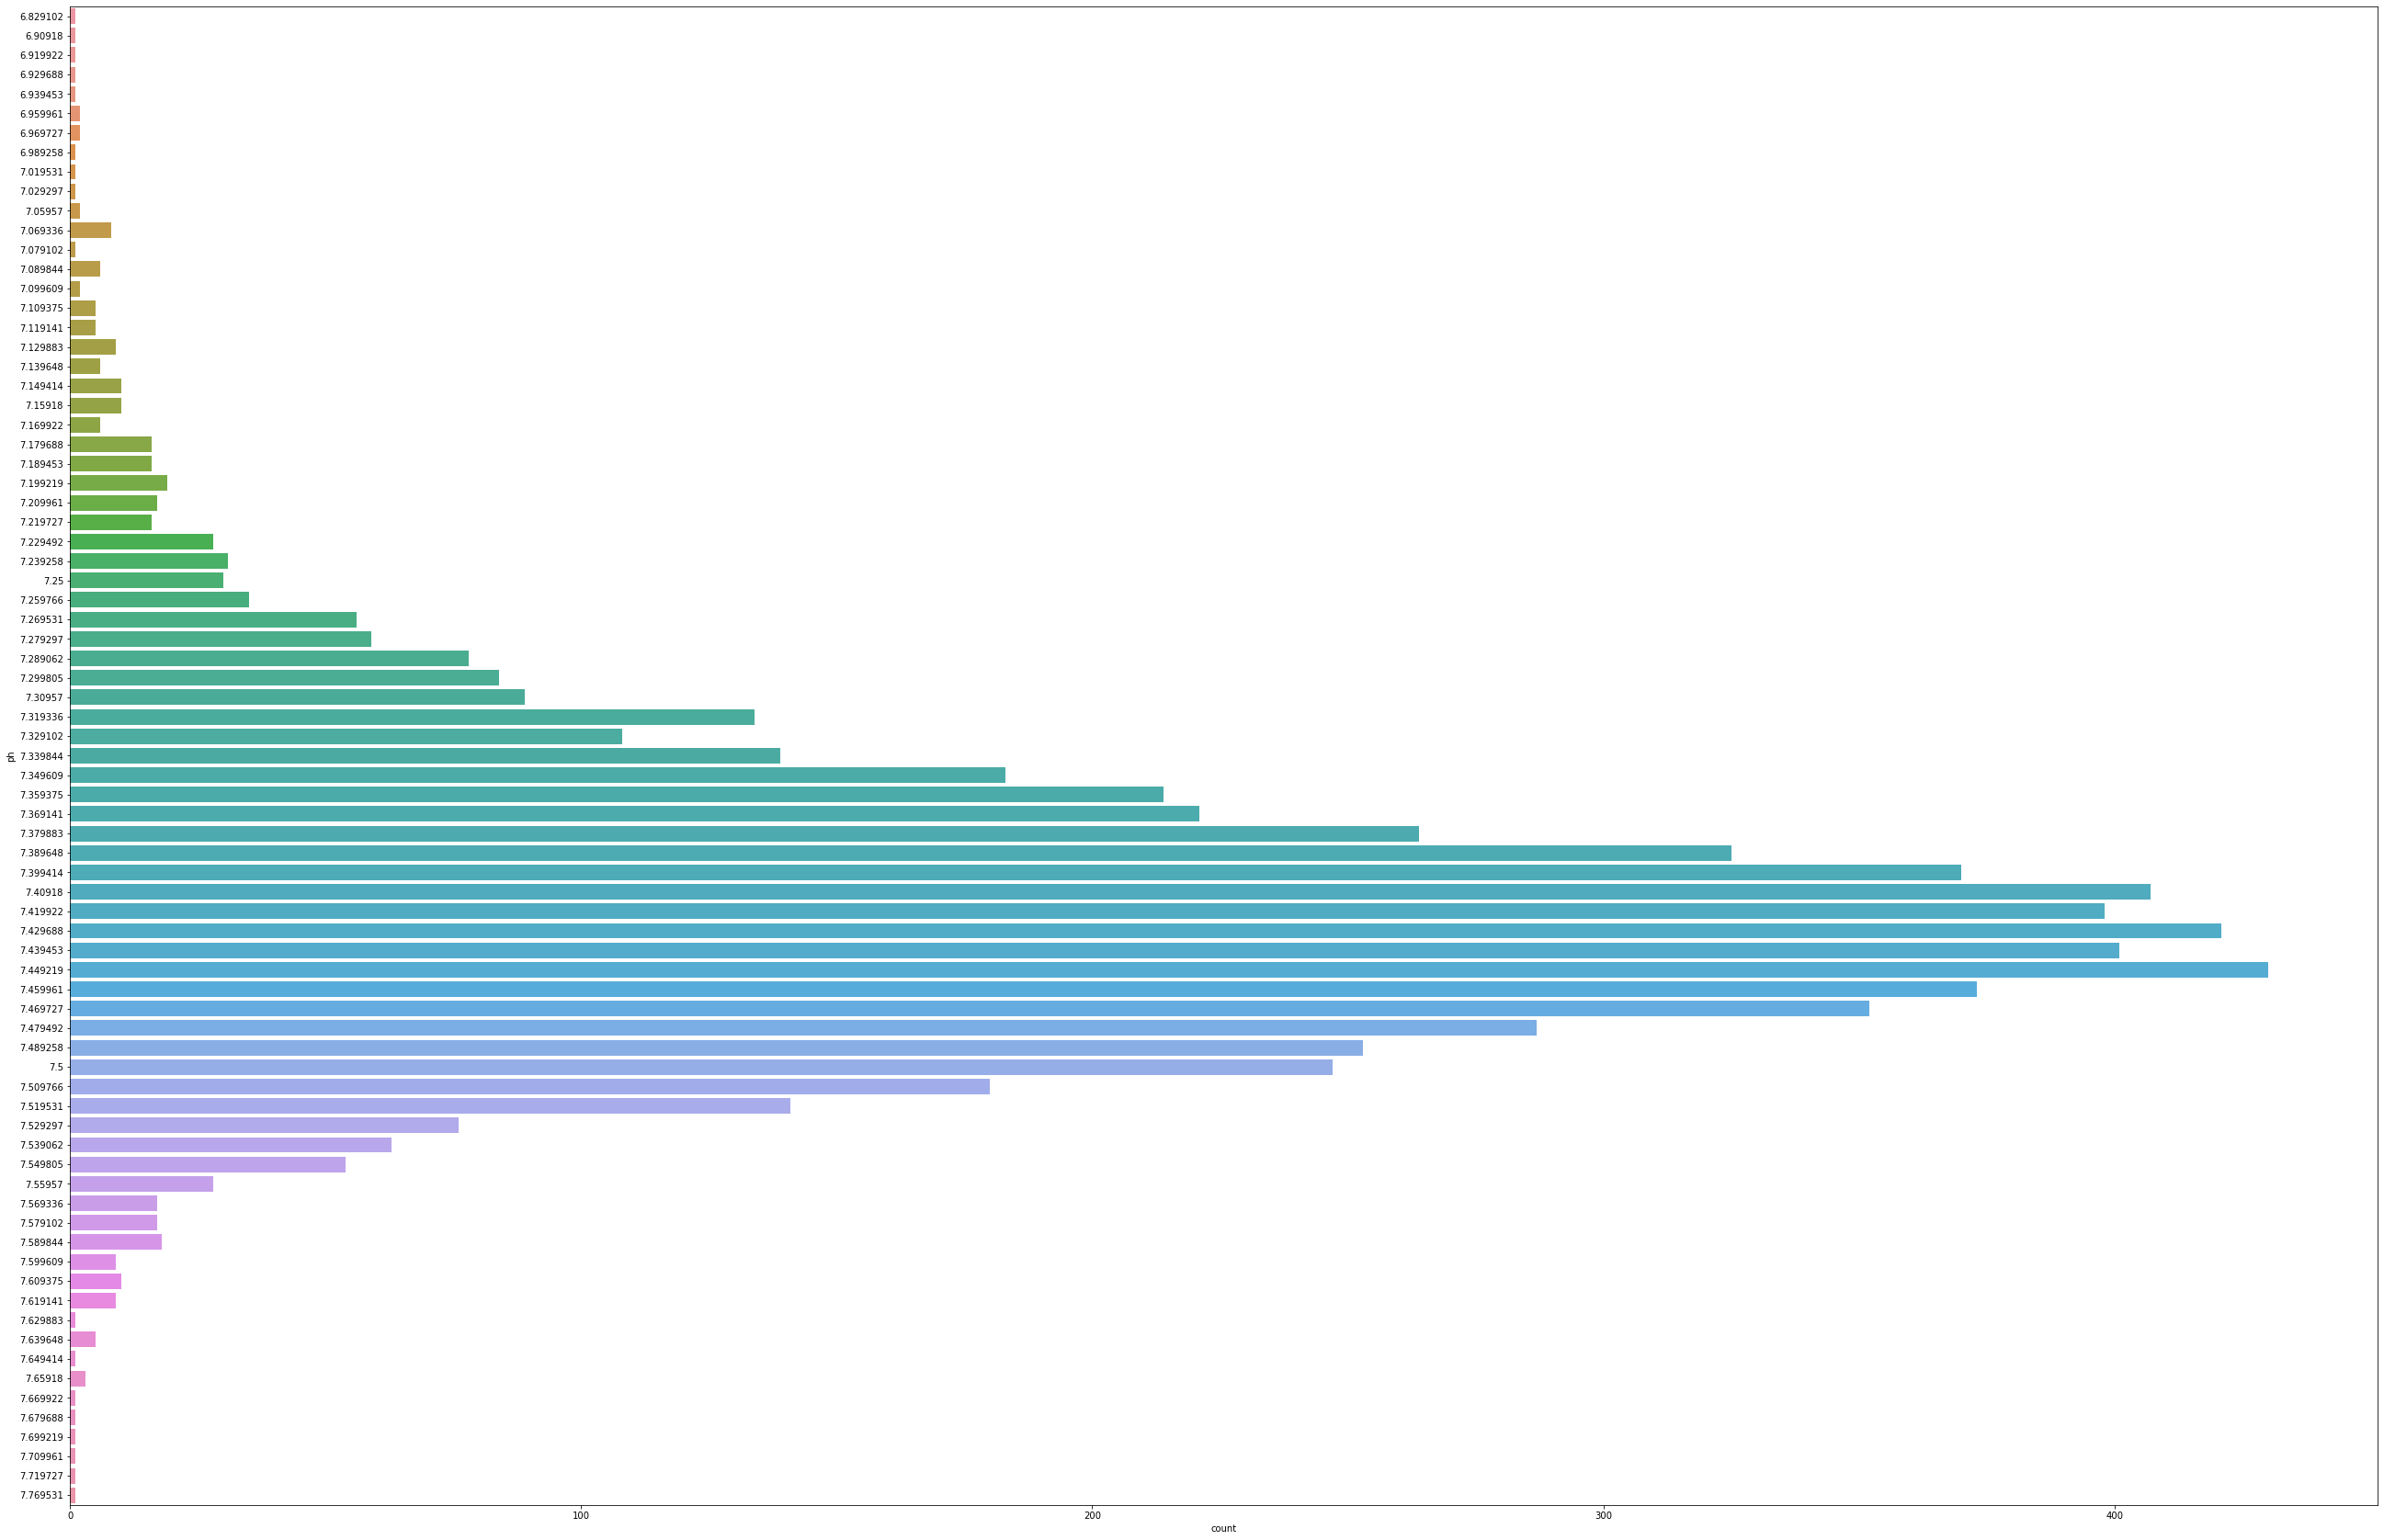

In [34]:
fig, _ = plt.subplots()
fig.set_size_inches(45,30)
sns.countplot(y='ph', data=kdata)

In [35]:
kdata['ph'].mean(), kdata['ph'].median()

(7.4153641505645025, 7.419922)

### We will fill the null values in 'ph' with the mean as well.

In [36]:
kdata['ph'].fillna(kdata['ph'].mean(), inplace=True)

<AxesSubplot:xlabel='count', ylabel='adls'>

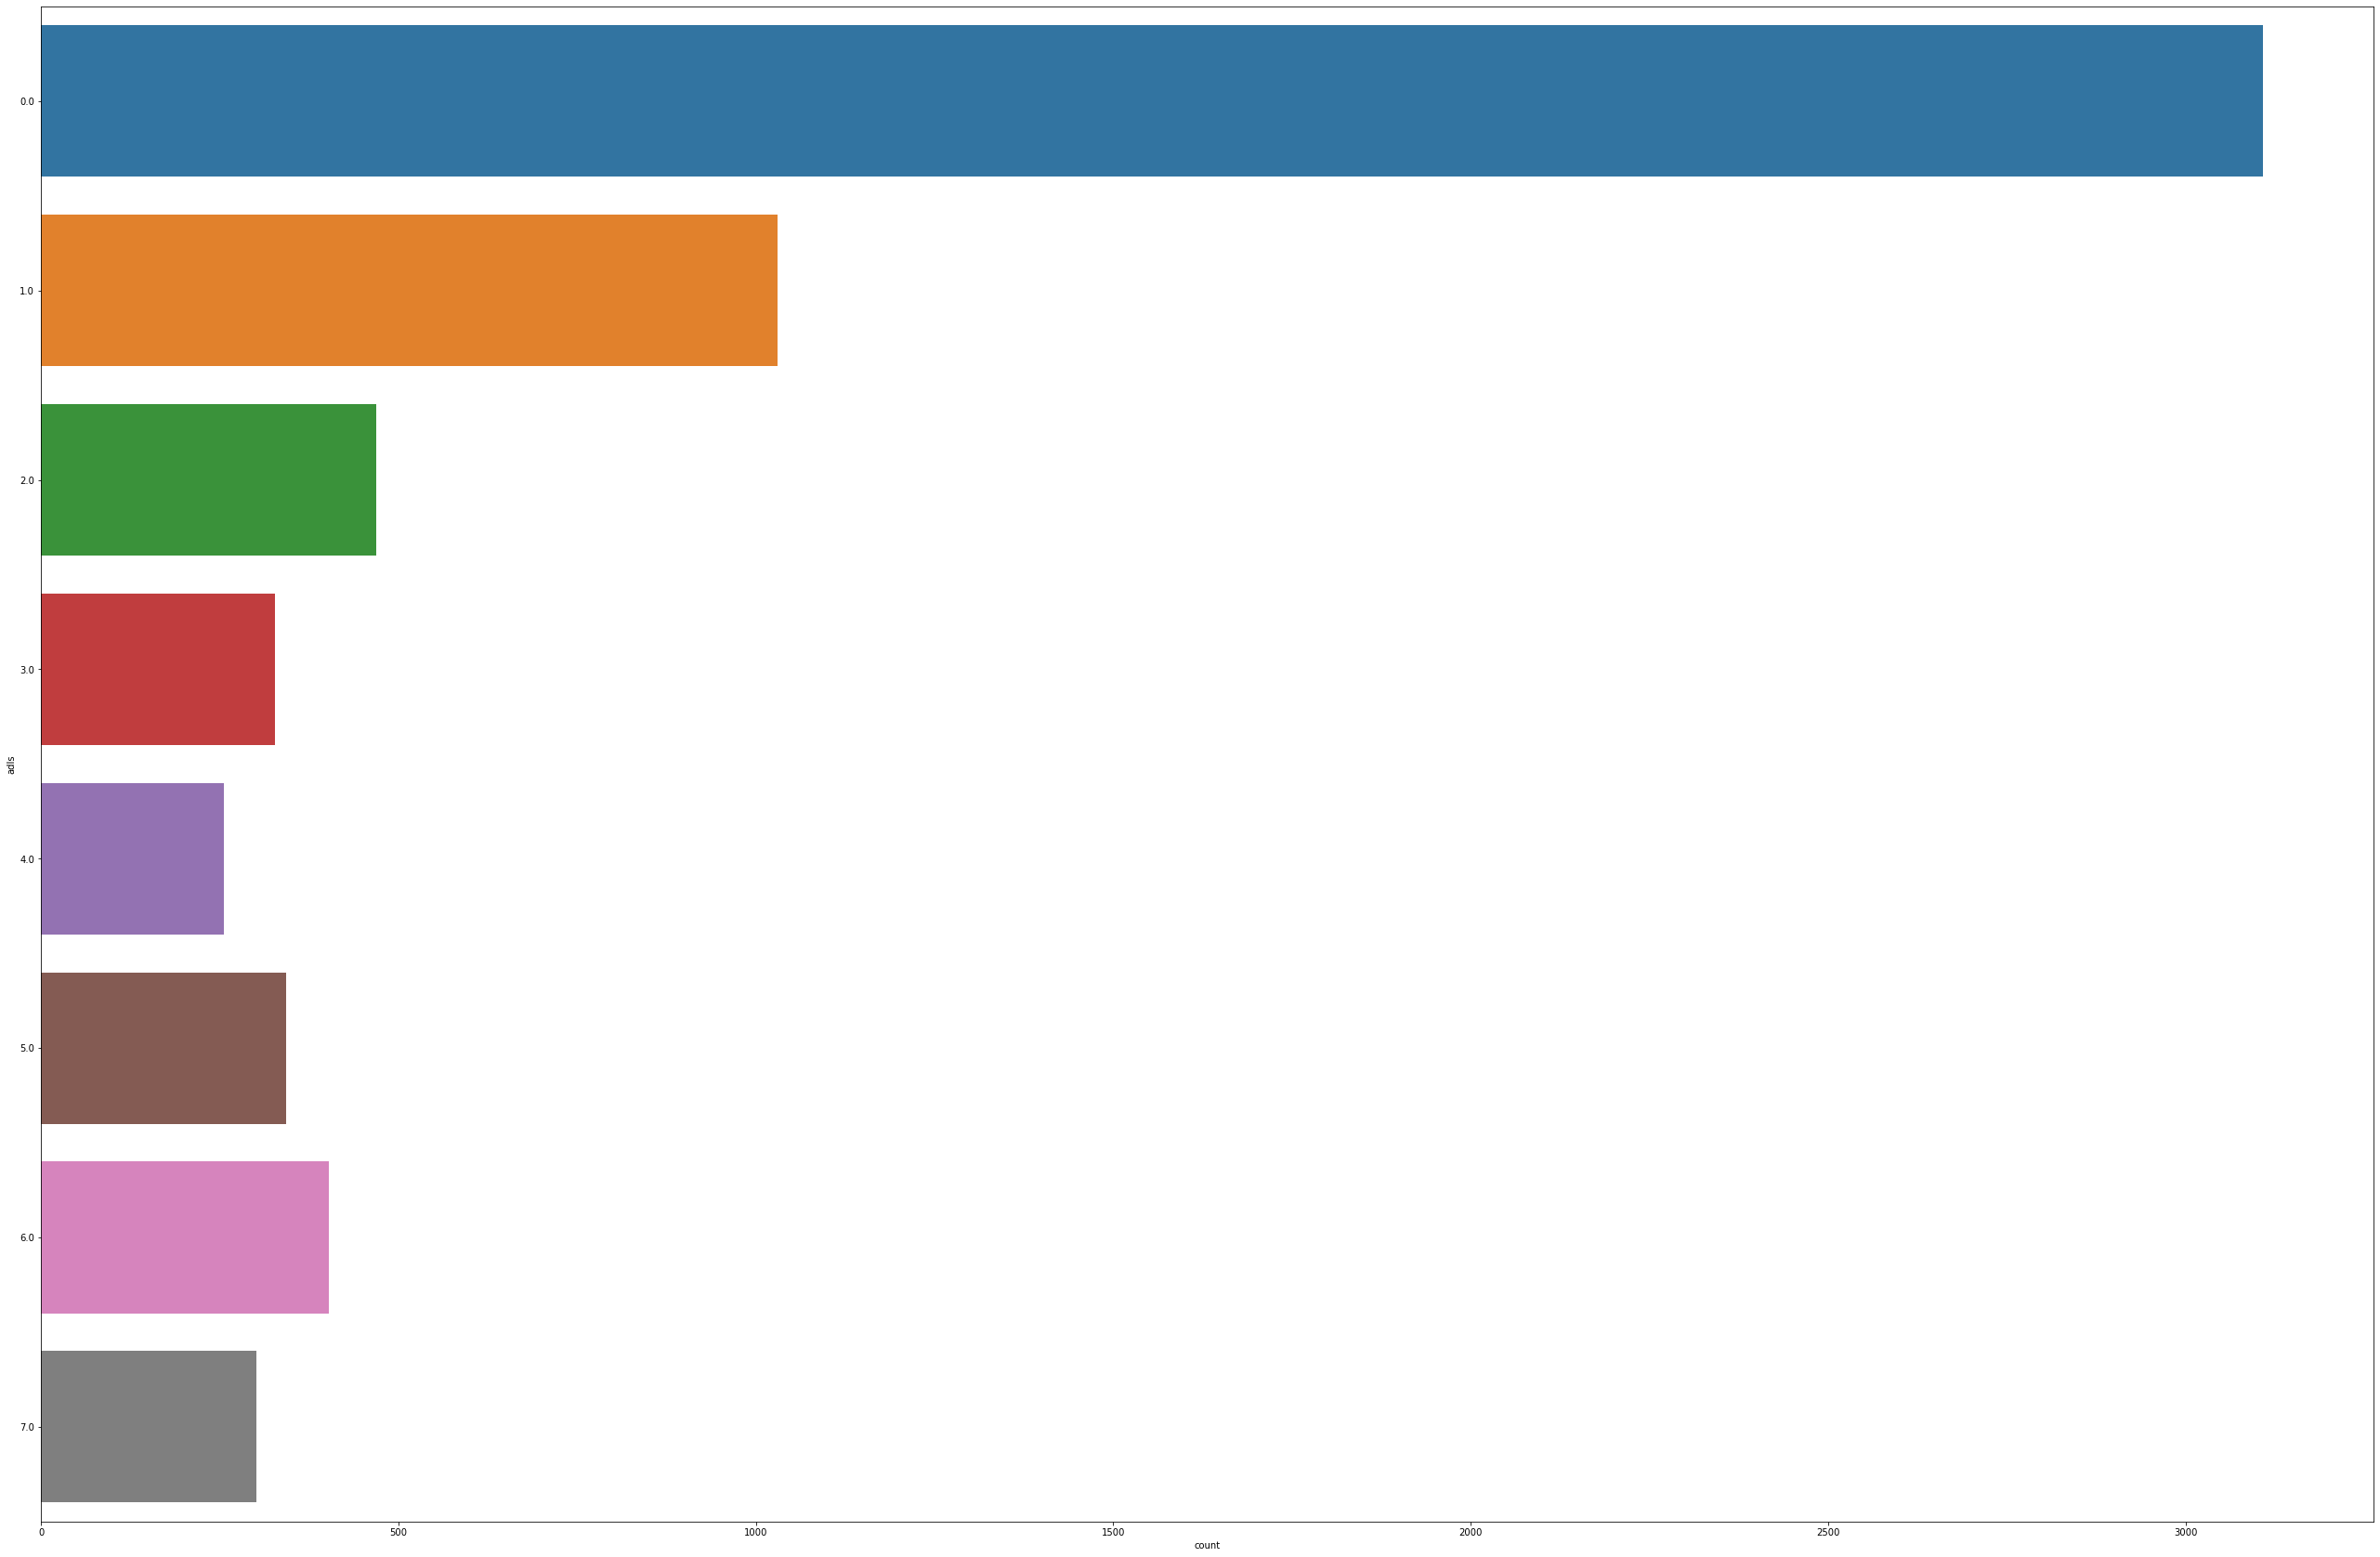

In [37]:
fig, _ = plt.subplots()
fig.set_size_inches(45,30)
sns.countplot(y='adls', data=kdata)

In [38]:
kdata['adls'].median(), kdata['adls'].mean()

(1.0, 1.637383776851555)

### We will fill the null values in 'adls' with the median.

In [39]:
kdata['adls'].fillna(kdata['adls'].median(), inplace=True)
kdata.isna().sum()

age           0
sex           0
dzgroup       0
dzclass       0
num.co        0
income        0
scoma         1
charges     172
totcst      888
avtisst      82
race         42
sps           1
aps           1
surv2m        1
surv6m        1
hday          0
diabetes      0
dementia      0
ca            0
prg2m         0
prg6m         0
dnr          30
dnrday       30
meanbp        1
wblc          0
hrt           1
resp          1
temp          1
pafi          0
alb           0
bili          0
crea          0
sod           1
ph            0
bun           0
urine         0
adls          0
adlsc         0
hospdead      0
dtype: int64

<AxesSubplot:xlabel='totcst', ylabel='Density'>

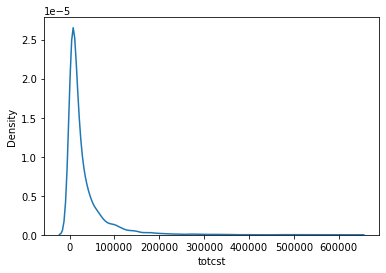

In [40]:
sns.kdeplot(data=kdata['totcst'])

### The 'totcst' columns has outliers as shown in the kde plot. We will remove them and fill the nulls with the mean.

In [41]:
kdata.columns

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'income', 'scoma',
       'charges', 'totcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m',
       'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'bun', 'urine', 'adls', 'adlsc',
       'hospdead'],
      dtype='object')

In [42]:
drop_Outliers(8)

In [43]:
kdata['totcst'].fillna(kdata['totcst'].mean(), inplace=True)
kdata.isna().sum()

age           0
sex           0
dzgroup       0
dzclass       0
num.co        0
income        0
scoma         1
charges     172
totcst        0
avtisst      82
race         42
sps           1
aps           1
surv2m        1
surv6m        1
hday          0
diabetes      0
dementia      0
ca            0
prg2m         0
prg6m         0
dnr          30
dnrday       30
meanbp        1
wblc          0
hrt           1
resp          1
temp          1
pafi          0
alb           0
bili          0
crea          0
sod           1
ph            0
bun           0
urine         0
adls          0
adlsc         0
hospdead      0
dtype: int64

In [44]:
kdata.dropna(axis=0, inplace=True) # Drop the remaining row null values.

### Let's plot a correlation matrix for the dataframe.

<AxesSubplot:>

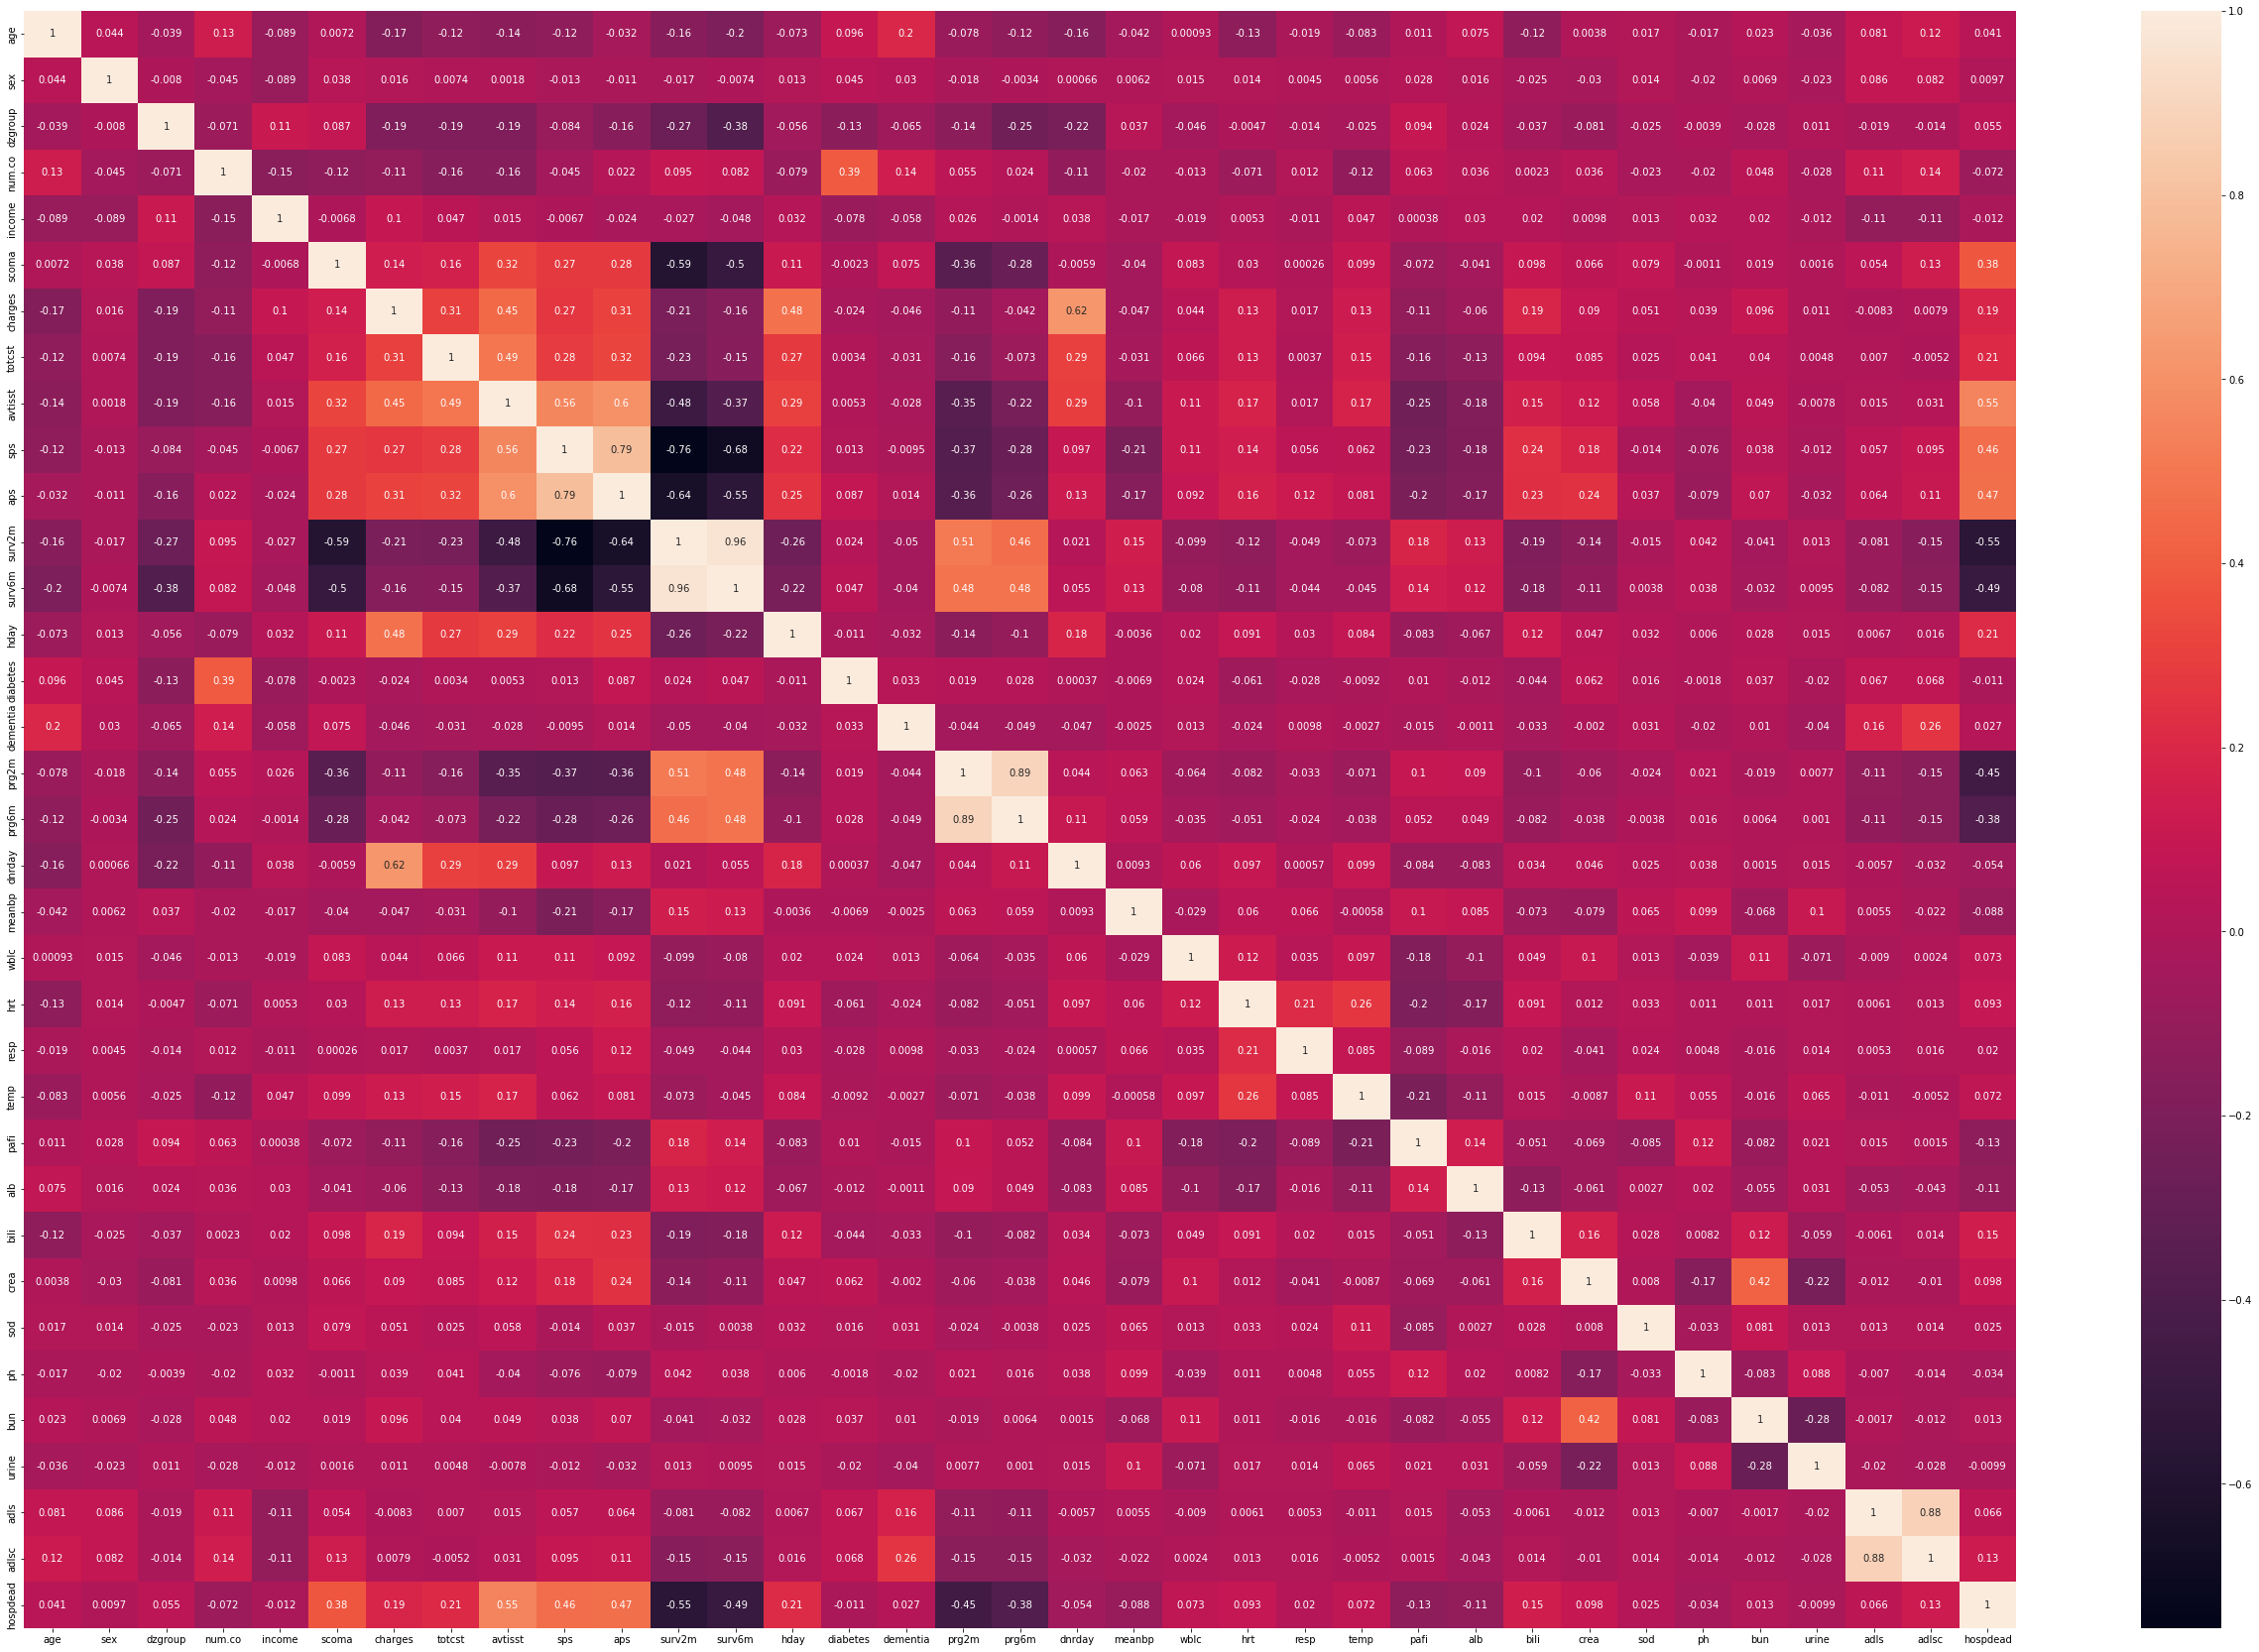

In [45]:
fig, _ = plt.subplots()
fig.set_size_inches(45,30)
sns.heatmap(kdata.corr(), annot=True)

In [46]:
kdata.shape

(8805, 39)

### Still 4 columns are of different datatype. So we will convert their datatypes or label encode them.

In [47]:
kdata['dzclass'].unique()

array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object)

In [48]:
dz_class_enc = LabelEncoder()
dz_class_enc = dz_class_enc.fit_transform(kdata['dzclass'])
kdata['dzclass'] = dz_class_enc
kdata['dzclass'].unique()

array([2, 1, 0, 3])

In [49]:
kdata['race'].unique()

array(['other', 'white', 'hispanic', 'asian', 'black'], dtype=object)

In [50]:
race_enc = LabelEncoder()
race_new = race_enc.fit_transform(kdata['race'])
kdata['race'] = race_new
kdata['race'].unique()

array([3, 4, 2, 0, 1])

In [51]:
kdata['ca'].unique()

array(['metastatic', 'no', 'yes'], dtype=object)

In [52]:
kdata['ca'].replace({'metastatic': 2, 'no': 0, 'yes': 1}, inplace=True)

In [53]:
kdata.dtypes

age         float64
sex           int64
dzgroup       int32
dzclass       int32
num.co        int64
income        int64
scoma       float64
charges     float64
totcst      float64
avtisst     float64
race          int32
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca            int64
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
bun         float64
urine       float64
adls        float64
adlsc       float64
hospdead      int64
dtype: object

In [54]:
kdata['dnr'].unique()

array(['no dnr', 'dnr after sadm', 'dnr before sadm'], dtype=object)

In [55]:
kdata['dnr'].replace({'no dnr': 1, 'dnr after sadm': 2, 'dnr before sadm': 0}, inplace=True)

In [56]:
kdata.shape

(8805, 39)

<AxesSubplot:>

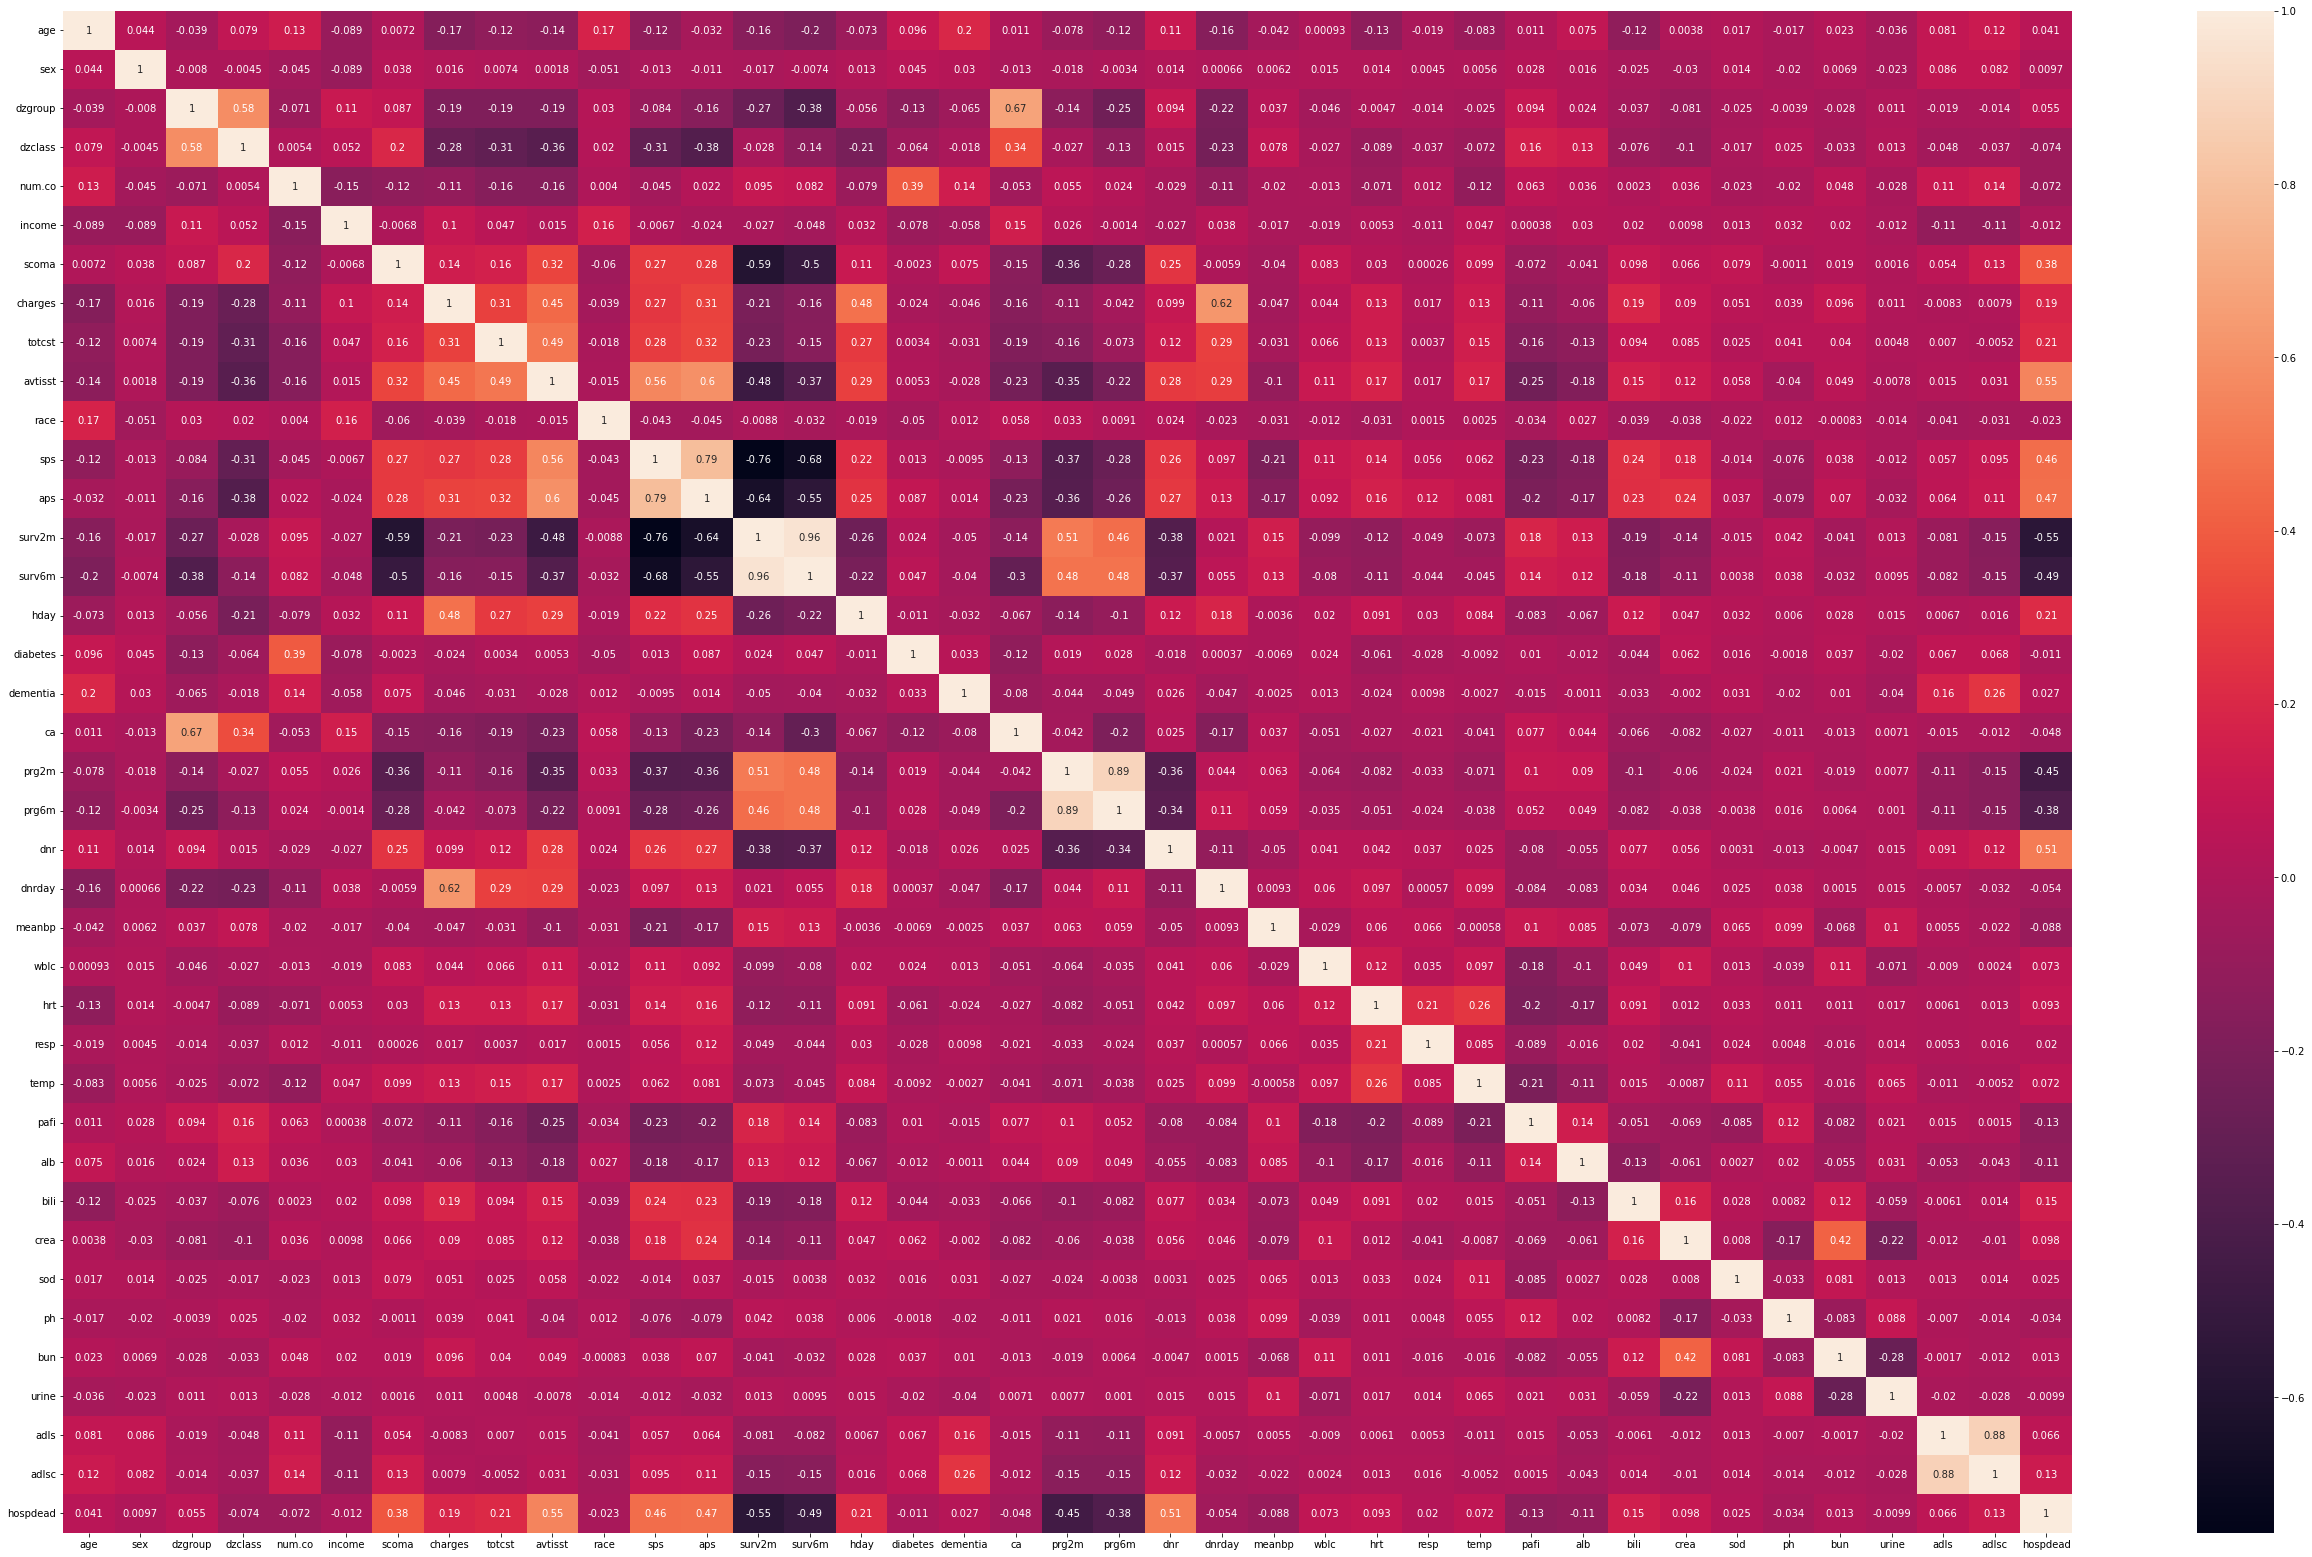

In [57]:
fig, _ = plt.subplots()
fig.set_size_inches(45,28)
sns.heatmap(kdata.corr(), annot=True)

In [58]:
kdata.dtypes

age         float64
sex           int64
dzgroup       int32
dzclass       int32
num.co        int64
income        int64
scoma       float64
charges     float64
totcst      float64
avtisst     float64
race          int32
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca            int64
prg2m       float64
prg6m       float64
dnr           int64
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
bun         float64
urine       float64
adls        float64
adlsc       float64
hospdead      int64
dtype: object

In [59]:
kdata.isna().sum()

age         0
sex         0
dzgroup     0
dzclass     0
num.co      0
income      0
scoma       0
charges     0
totcst      0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
bun         0
urine       0
adls        0
adlsc       0
hospdead    0
dtype: int64

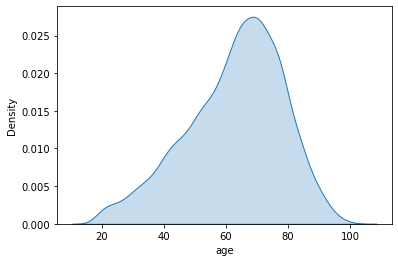

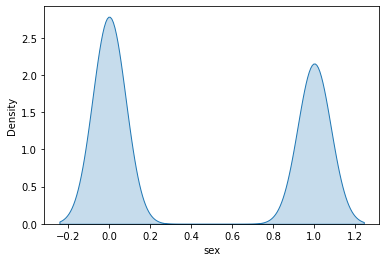

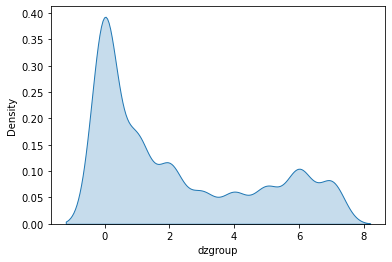

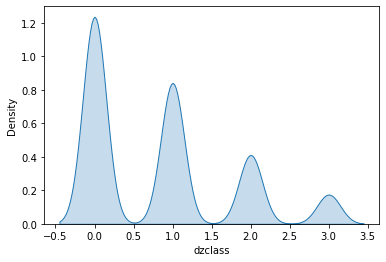

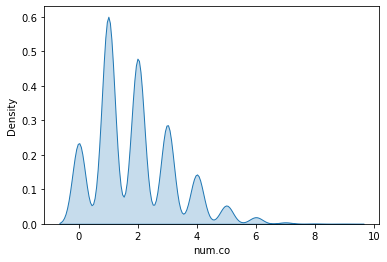

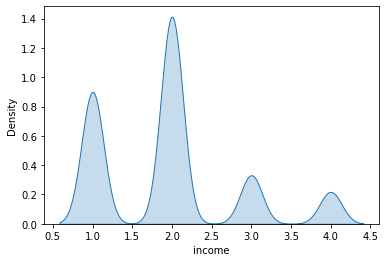

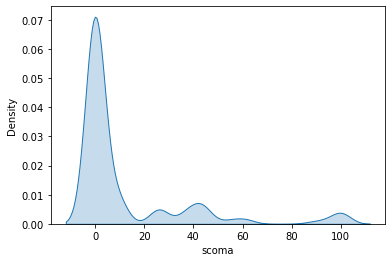

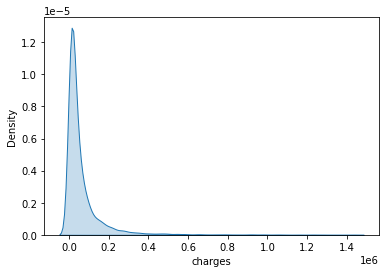

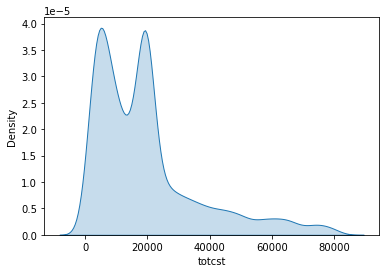

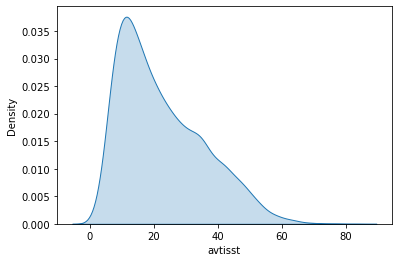

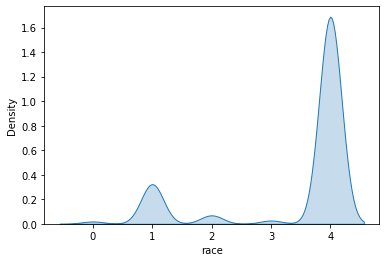

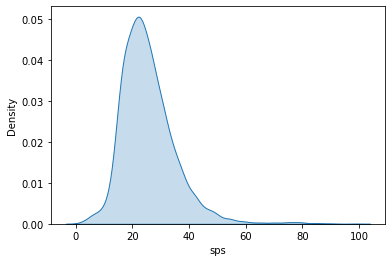

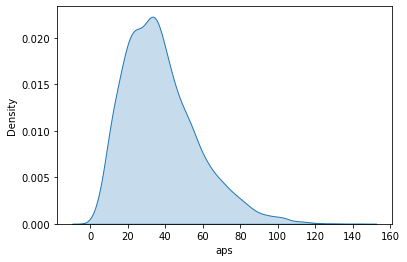

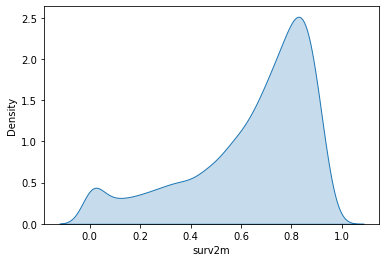

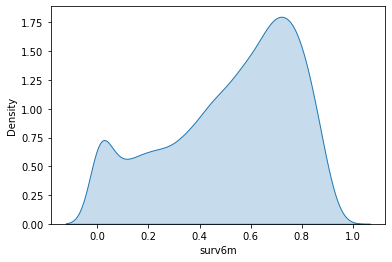

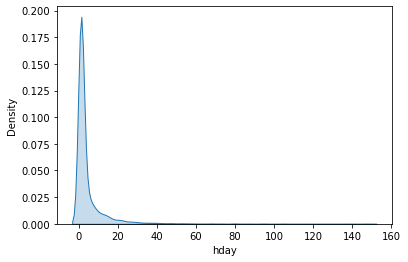

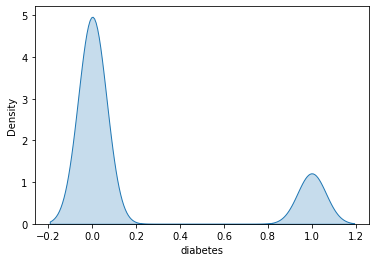

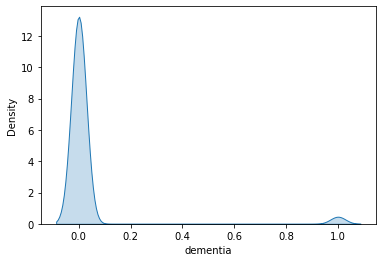

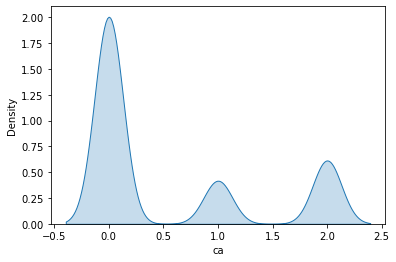

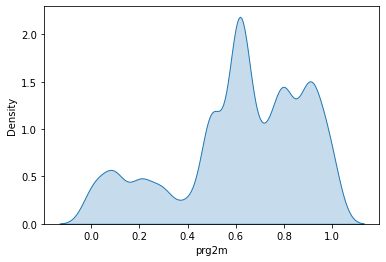

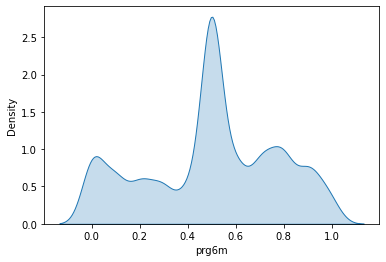

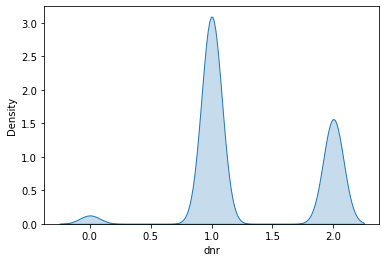

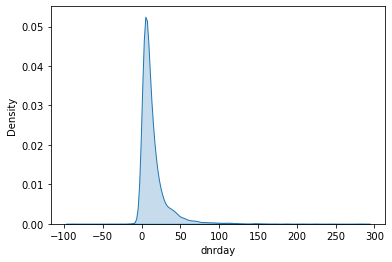

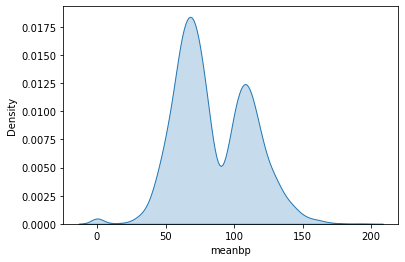

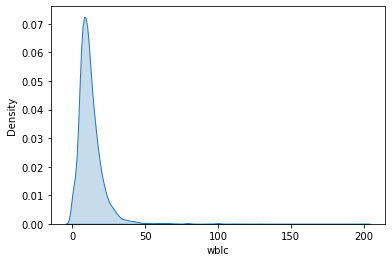

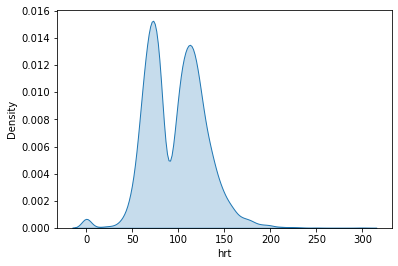

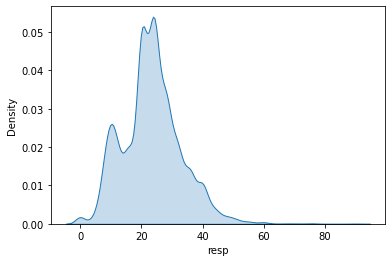

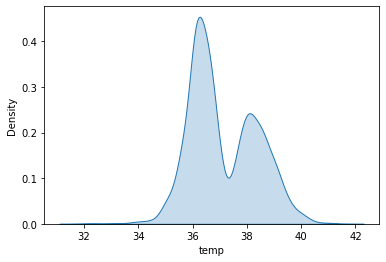

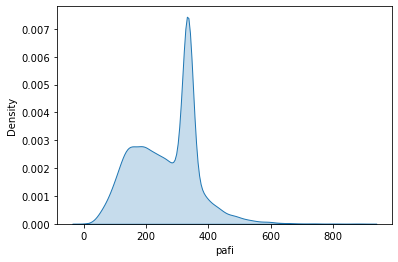

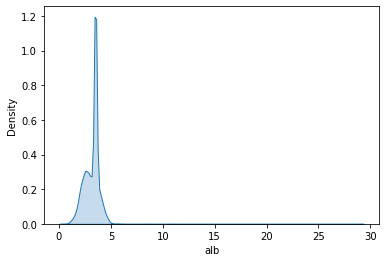

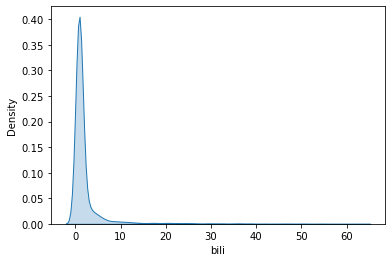

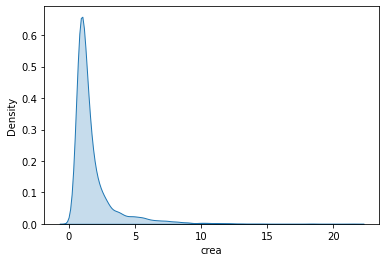

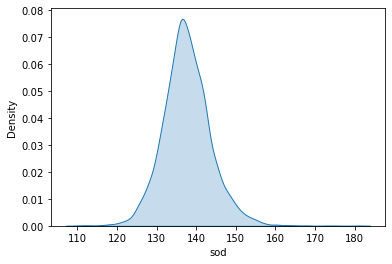

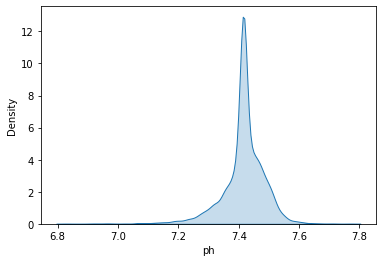

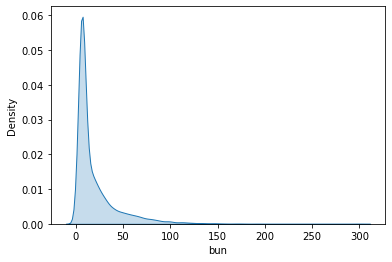

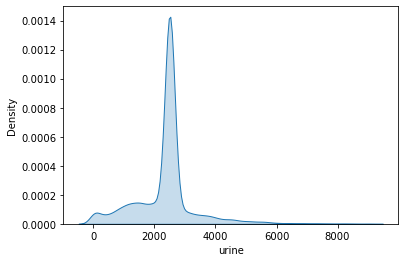

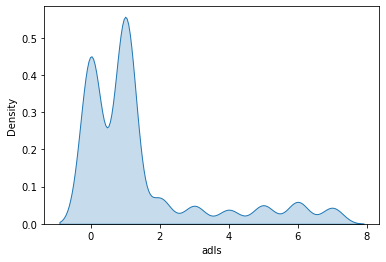

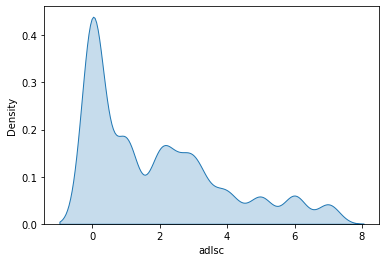

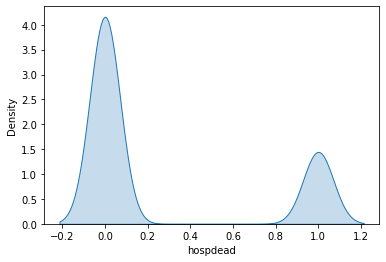

In [60]:
for col in kdata.columns:
    plt.figure()
    sns.kdeplot(kdata[col], shade=True, label=col)
    plt.show()

<AxesSubplot:>

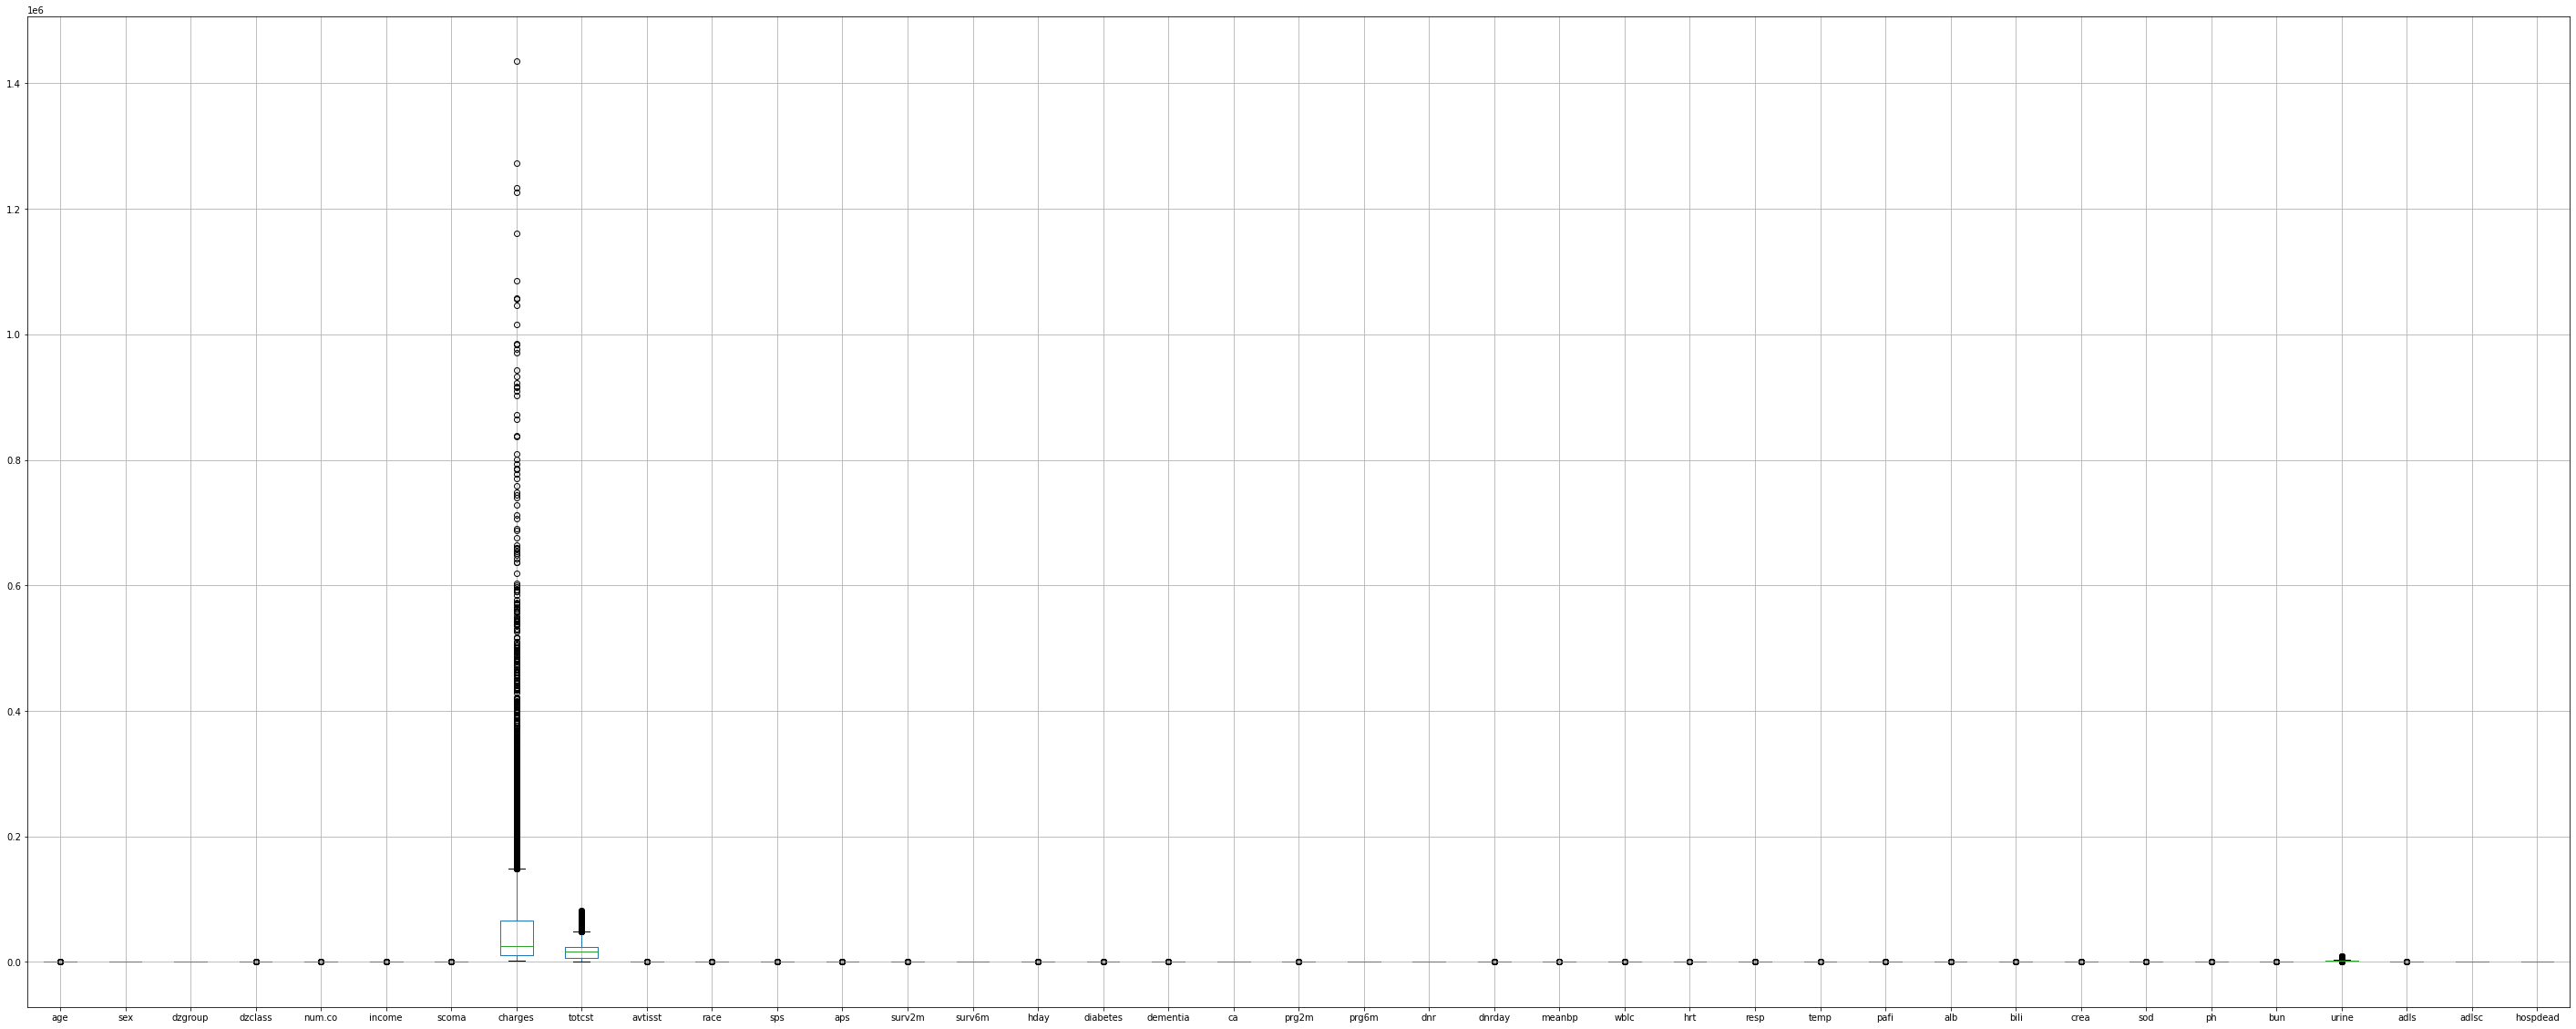

In [61]:
kdata.boxplot(figsize=(50,20))

### The 'charges' column has many outliers, so we will drop them using IQR.

In [62]:
kdata.columns

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'income', 'scoma',
       'charges', 'totcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m',
       'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'bun', 'urine', 'adls', 'adlsc',
       'hospdead'],
      dtype='object')

In [63]:
drop_Outliers(7)

In [64]:
kdata.isna().sum()

age           0
sex           0
dzgroup       0
dzclass       0
num.co        0
income        0
scoma         0
charges     899
totcst        0
avtisst       0
race          0
sps           0
aps           0
surv2m        0
surv6m        0
hday          0
diabetes      0
dementia      0
ca            0
prg2m         0
prg6m         0
dnr           0
dnrday        0
meanbp        0
wblc          0
hrt           0
resp          0
temp          0
pafi          0
alb           0
bili          0
crea          0
sod           0
ph            0
bun           0
urine         0
adls          0
adlsc         0
hospdead      0
dtype: int64

In [65]:
kdata['charges'].isna().sum()
kdata['charges'].fillna(kdata['charges'].mean(), inplace=True)

### Final look at outliers.

In [66]:
kdata

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,avtisst,...,alb,bili,crea,sod,ph,bun,urine,adls,adlsc,hospdead
0,62.84998,0,6,2,0,2,0.0,9715.0,19418.772473,7.000000,...,1.799805,0.199982,1.199951,141.0,7.459961,6.51,2502.0,7.0,7.000000,0
2,52.74698,1,3,1,2,1,0.0,41094.0,19418.772473,13.000000,...,3.500000,2.199707,2.000000,134.0,7.459961,6.51,2502.0,0.0,0.000000,0
3,42.38498,1,6,2,2,1,0.0,3075.0,19418.772473,7.000000,...,3.500000,1.010000,0.799927,139.0,7.415364,6.51,2502.0,0.0,0.000000,0
4,79.88495,1,0,0,1,2,26.0,50127.0,19418.772473,18.666656,...,3.500000,1.010000,0.799927,143.0,7.509766,6.51,2502.0,2.0,2.000000,0
5,93.01599,0,5,3,1,2,55.0,6884.0,19418.772473,5.000000,...,3.500000,1.010000,0.699951,140.0,7.659180,6.51,2502.0,1.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,0,0,0,1,2,0.0,52870.0,34329.312500,20.333328,...,3.699707,0.399963,1.099854,131.0,7.459961,21.00,2502.0,0.0,0.000000,0
9101,55.15399,1,5,3,1,2,41.0,35377.0,23558.500000,18.000000,...,3.500000,1.010000,5.899414,135.0,7.289062,49.00,0.0,0.0,0.000000,0
9102,70.38196,0,0,0,1,2,0.0,46564.0,31409.015600,23.000000,...,3.500000,0.399963,2.699707,139.0,7.379883,60.00,3900.0,1.0,2.525391,0
9103,47.01999,0,7,0,1,2,0.0,58439.0,19418.772473,35.500000,...,1.199951,0.399963,3.500000,135.0,7.469727,55.00,2502.0,0.0,0.000000,1


In [67]:
X = kdata.iloc[:, 0:37]
y = kdata.iloc[:, 38]

<AxesSubplot:>

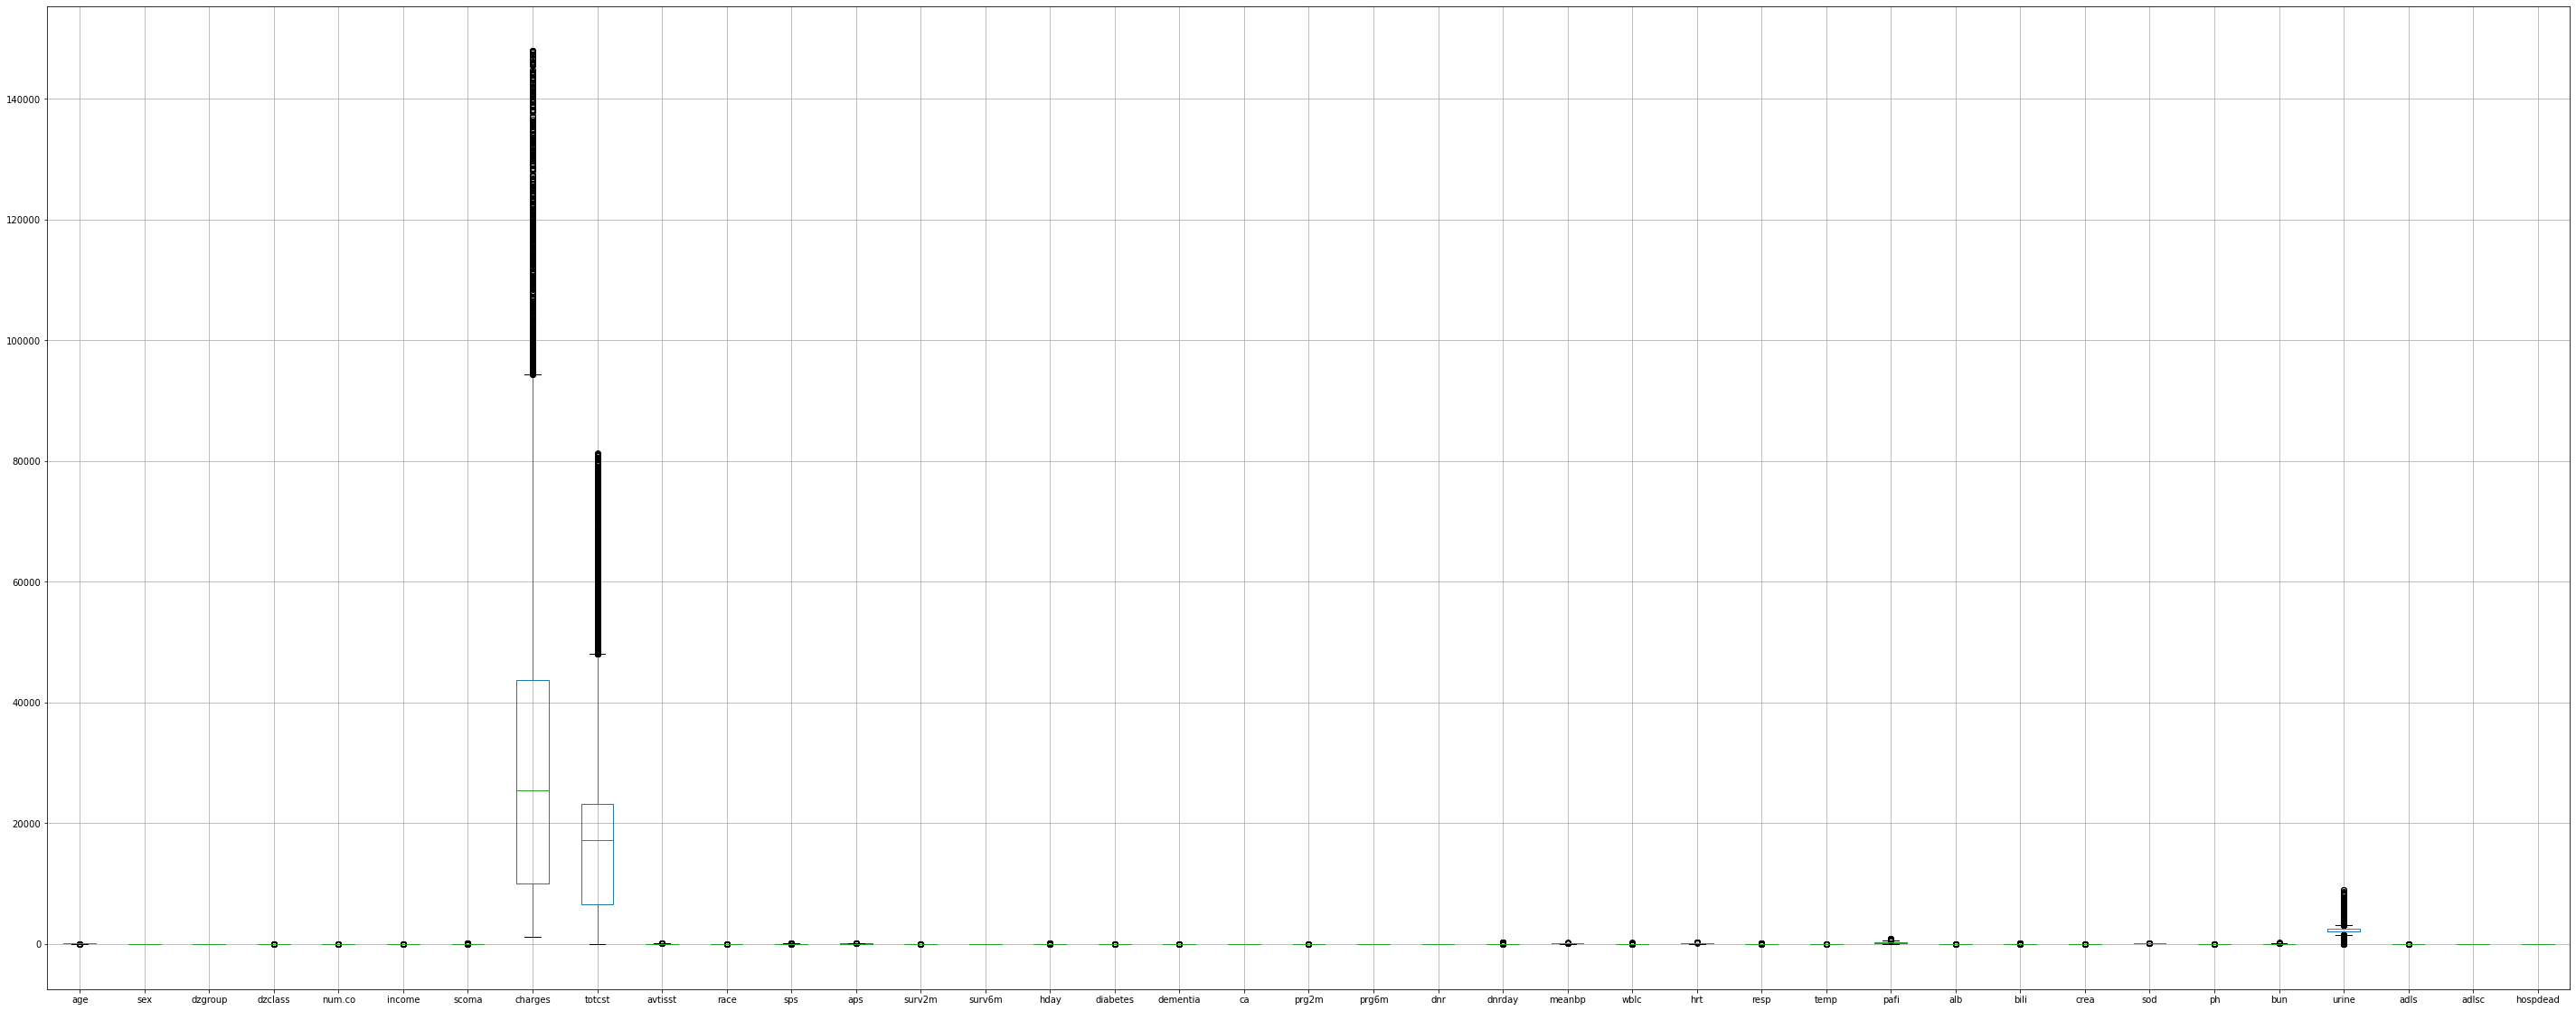

In [68]:
kdata.boxplot(figsize=(50,20))

In [69]:
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier,IsolationForest

### Calculating outliers using EllipticEnvelope

In [70]:
outlierDetector1 = EllipticEnvelope()
result1 = outlierDetector1.fit_predict(X)
Outliers1 = X[result1==-1]
print("Number of detected outliers is " +str(len(Outliers1)))

Number of detected outliers is 881


### Calculating outliers using LocalOutlierFactor

In [71]:
outlierDetector2 =  LocalOutlierFactor(n_neighbors=20)
result2 = outlierDetector2.fit_predict(X)
Outliers2 = X[result2==-1]
print("Number of detected outliers is " +str(len(Outliers2)))

Number of detected outliers is 468


### Calculating outliers using IsolationForest

In [72]:
outlierDetector3 =  IsolationForest(n_estimators=100,random_state = 42)
result3 = outlierDetector3.fit_predict(X)
Outliers3 = X[result3==-1]
print("Number of detected outliers is " +str(len(Outliers3)))

Number of detected outliers is 772


### The results show that there are no significant outliers. The minimum that is detected, out of 8805 records, is 468 by the local outlier factor. Also, Isolation Forest detected only 772 outliers and Elliptic Envelope detected 881.

## Finally, the dataframe is ready. No nulls and no significant outliers.
## The next stage is organized as follows:
### Part 1: Training a Support Vector Machine Model.
### Part 2: Training a Random Forest Model.
### Part 3: Training a Logistics Regression Model.
### Part 4: Training an ensemble model of Random Forest & Logistic Regression.
### Part 5: Training an ensemble model of Support Vector Machine & Random Forest Classifier & Logistic Regression. 
### Part 6: Implementing a Decision Tree Model with Bagging and Boosting.

# --------------------------------------------------------------------------------------------------------------

In [73]:
kdata

,age,sex,dzgroup,dzclass,num.co,income,scoma,charges,totcst,avtisst,...,alb,bili,crea,sod,ph,bun,urine,adls,adlsc,hospdead
0,62.84998,0,6,2,0,2,0.0,9715.0,19418.772473,7.000000,...,1.799805,0.199982,1.199951,141.0,7.459961,6.51,2502.0,7.0,7.000000,0
2,52.74698,1,3,1,2,1,0.0,41094.0,19418.772473,13.000000,...,3.500000,2.199707,2.000000,134.0,7.459961,6.51,2502.0,0.0,0.000000,0
3,42.38498,1,6,2,2,1,0.0,3075.0,19418.772473,7.000000,...,3.500000,1.010000,0.799927,139.0,7.415364,6.51,2502.0,0.0,0.000000,0
4,79.88495,1,0,0,1,2,26.0,50127.0,19418.772473,18.666656,...,3.500000,1.010000,0.799927,143.0,7.509766,6.51,2502.0,2.0,2.000000,0
5,93.01599,0,5,3,1,2,55.0,6884.0,19418.772473,5.000000,...,3.500000,1.010000,0.699951,140.0,7.659180,6.51,2502.0,1.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,0,0,0,1,2,0.0,52870.0,34329.312500,20.333328,...,3.699707,0.399963,1.099854,131.0,7.459961,21.00,2502.0,0.0,0.000000,0
9101,55.15399,1,5,3,1,2,41.0,35377.0,23558.500000,18.000000,...,3.500000,1.010000,5.899414,135.0,7.289062,49.00,0.0,0.0,0.000000,0
9102,70.38196,0,0,0,1,2,0.0,46564.0,31409.015600,23.000000,...,3.500000,0.399963,2.699707,139.0,7.379883,60.00,3900.0,1.0,2.525391,0
9103,47.01999,0,7,0,1,2,0.0,58439.0,19418.772473,35.500000,...,1.199951,0.399963,3.500000,135.0,7.469727,55.00,2502.0,0.0,0.000000,1


<AxesSubplot:xlabel='hospdead', ylabel='count'>

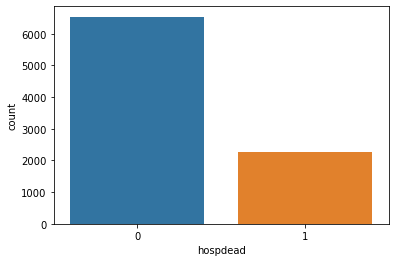

In [74]:
sns.countplot(x='hospdead', data=kdata)

In [75]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.svm import SVC
import sklearn.linear_model as lm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE,RandomOverSampler

import math

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [78]:
X = kdata.iloc[:,0:37]
y = kdata.iloc[:,38]

#Following the train-test size 70% 30% repectively.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=10)

In [130]:
def plot_feature_importances(model):
    n_features = kdata.shape[1]-2
    plt.figure(figsize=(20,16))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), kdata.columns[0:37].values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

## Part 1: Training a Support Vector Machine Model.

### With no sampling.

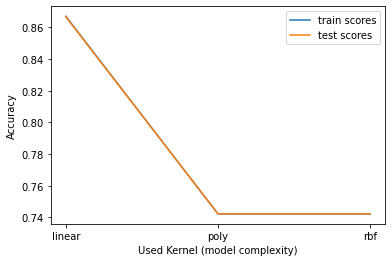

In [80]:
kernels = ['linear', 'poly', 'rbf']
scores_test = []
scores_train = []
for k in kernels:
    model_1 = SVC(kernel=k).fit(X_train1, y_train1)
    y_pred = model_1.predict(X_test1)
    scores_train.append(accuracy_score(y_train1, model_1.predict(X_train1)))
    scores_test.append(accuracy_score(y_test1, y_pred))

plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### It is clear that an SVM model with a "linear" kernel achieves the highest accuracy.

In [81]:
for i in range(1,10):
    model_1 = SVC(kernel='linear', C=i).fit(X_train1, y_train1)
    print(f"Accuracy on training set using C = {i}: {model_1.score(X_train1, y_train1)}")
    print(f"Accuracy on test set using C = {i}: {model_1.score(X_test1, y_test1)}")
    print("\n")

Accuracy on training set using C = 1: 0.8671101736167451
Accuracy on test set using C = 1: 0.8667676003028009


Accuracy on training set using C = 2: 0.8651630699334739
Accuracy on test set using C = 2: 0.8656320968962907


Accuracy on training set using C = 3: 0.8645140353723836
Accuracy on test set using C = 3: 0.8622255866767601


Accuracy on training set using C = 4: 0.8656498458542917
Accuracy on test set using C = 4: 0.8667676003028009


Accuracy on training set using C = 5: 0.8666233976959273
Accuracy on test set using C = 5: 0.8652535957607873


Accuracy on training set using C = 6: 0.8680837254583806
Accuracy on test set using C = 6: 0.8629825889477668


Accuracy on training set using C = 7: 0.8645140353723836
Accuracy on test set using C = 7: 0.8622255866767601


Accuracy on training set using C = 8: 0.8653253285737466
Accuracy on test set using C = 8: 0.8652535957607873


Accuracy on training set using C = 9: 0.8671101736167451
Accuracy on test set using C = 9: 0.86563209689

### As shown, the best model accuracy on the testing set is when C-value = 1

### So, we will build an SVM model with C-value equals 1 and a linear kernel.

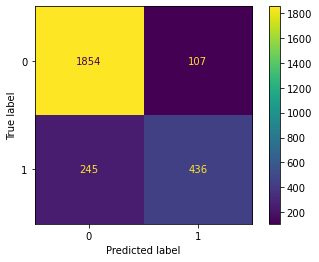

In [82]:
model_1F = SVC(kernel='linear', C=1).fit(X_train1, y_train1)

y_pred1 = model_1F.predict(X_test1)
confusion = confusion_matrix(y_test1, y_pred1)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

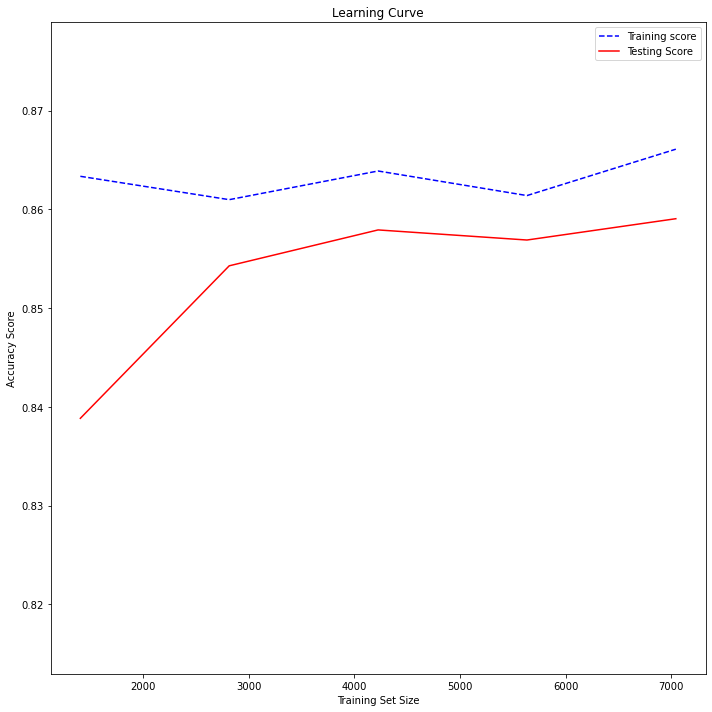

In [83]:
train_sizes, train_scores, test_scores =\
learning_curve(model_1F, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [84]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1961
           1       0.80      0.64      0.71       681

    accuracy                           0.87      2642
   macro avg       0.84      0.79      0.81      2642
weighted avg       0.86      0.87      0.86      2642



### Now, we will use oversampling technique and standard scalar to train another SVM model.

In [85]:
oversample = SMOTE(random_state=42)
overX_train1,overY_train1 = oversample.fit_resample(X_train1, y_train1)

scaler = StandardScaler()
scaled_X_train1=scaler.fit_transform(overX_train1)
scaled_X_test1=scaler.fit_transform(X_test1)

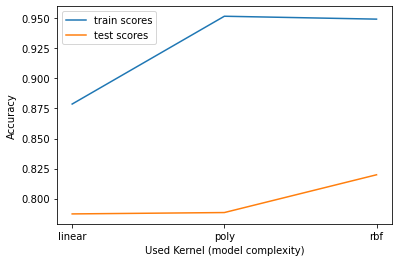

In [86]:
kernels = ['linear', 'poly', 'rbf']
scores_test = []
scores_train = []
for k in kernels:
    model_1_2 = SVC(kernel=k).fit(scaled_X_train1, overY_train1)
    y_pred2 = model_1_2.predict(scaled_X_test1)
    scores_train.append(accuracy_score(overY_train1, model_1_2.predict(scaled_X_train1)))
    scores_test.append(accuracy_score(y_test1, y_pred2))

plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### With standard scaler and oversampling, the "rbf" kernel achieves the highest testing accuracy. Next, we plot the confusion matrix for this model and see the learning curve.

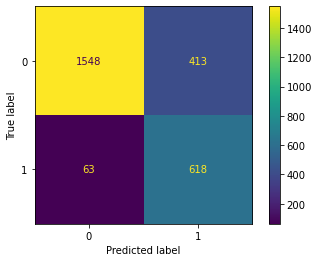

In [87]:
model_1_2 = SVC(kernel='rbf').fit(scaled_X_train1, overY_train1)

y_pred3 = model_1_2.predict(scaled_X_test1)
confusion = confusion_matrix(y_test1, y_pred3)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

### The confusion matrix shows that class 1 has too many False Positives.

In [88]:
print(classification_report(y_test1, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1961
           1       0.60      0.91      0.72       681

    accuracy                           0.82      2642
   macro avg       0.78      0.85      0.79      2642
weighted avg       0.87      0.82      0.83      2642



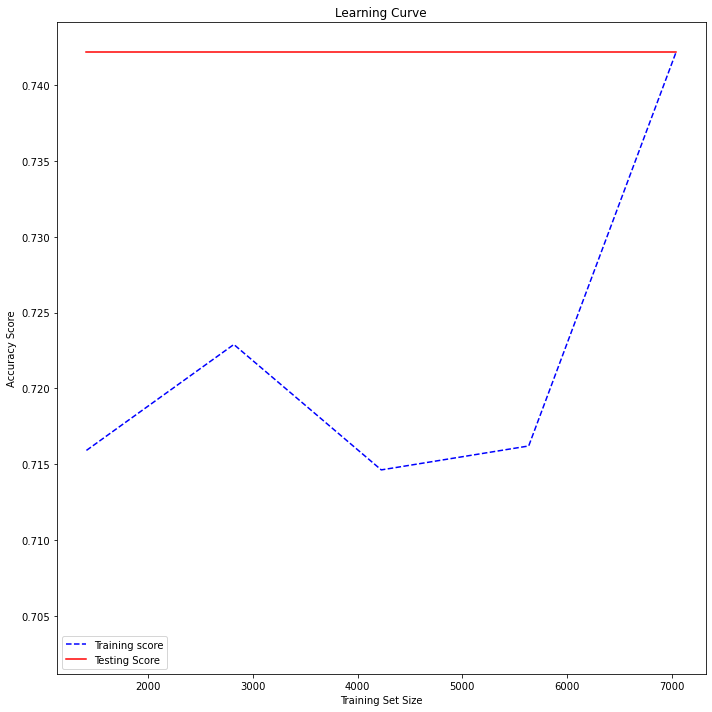

In [89]:
train_sizes, train_scores, test_scores =\
learning_curve(model_1_2, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### The results show that standard scaling with oversampling improves the precision of class 0 and massively improves the recall of class 1. While massively deteriorating the recall of class 0 and the precision of class 1.

## Part 2: Training a Random Forest Model.

In [90]:
#Getting an idea of the accuracy of the default model.

model_2 = RandomForestClassifier()
model_2.fit(X_train1, y_train1)
trainScoreN= model_2.score(X_train1, y_train1)
testScoreN= model_2.score(X_test1, y_test1)

print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Accuracy on training set: 1.000
Accuracy on testing set: 0.894


### Tunning the hyperparameters. 

In [91]:
trainScoreN = 0
testScoreN = 0
est = 0
maxDepth = 0

for i in range(20,200,10):
    for j in range(1,15):
        model_2 = RandomForestClassifier(n_estimators=i, max_depth=j)
        model_2.fit(X_train1, y_train1)
        trainScore= model_2.score(X_train1, y_train1)
        testScore= model_2.score(X_test1, y_test1)
        if (trainScore >= trainScoreN) & (testScore > testScoreN):
            trainScoreN = trainScore
            testScoreN = testScore
            est = i
            maxDepth = j

print("Best Accuracy at n_estimators= " + str(est) + " and max depth= " + str(maxDepth))
print("Accuracy on training set: {:.3f}".format(trainScoreN))
print("Accuracy on testing set: {:.3f}".format(testScoreN))

Best Accuracy at n_estimators= 190 and max depth= 14
Accuracy on training set: 0.995
Accuracy on testing set: 0.901


### The best accuracy is obtained with est = 190  and max depth = 14

In [92]:
model_2F = RandomForestClassifier(n_estimators=est, max_depth=maxDepth)
model_2F.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=14, n_estimators=190)

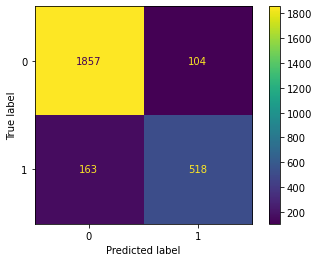

In [93]:
y_pred4 = model_2F.predict(X_test1)
confusion = confusion_matrix(y_test1, y_pred4)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

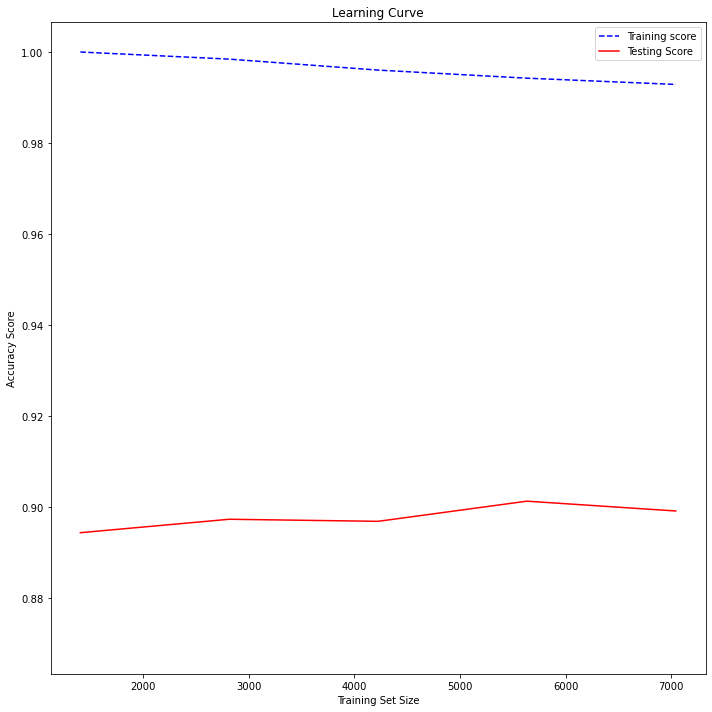

In [94]:
train_sizes, train_scores, test_scores =\
learning_curve(model_2F, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [95]:
print(classification_report(y_test1, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1961
           1       0.83      0.76      0.80       681

    accuracy                           0.90      2642
   macro avg       0.88      0.85      0.86      2642
weighted avg       0.90      0.90      0.90      2642



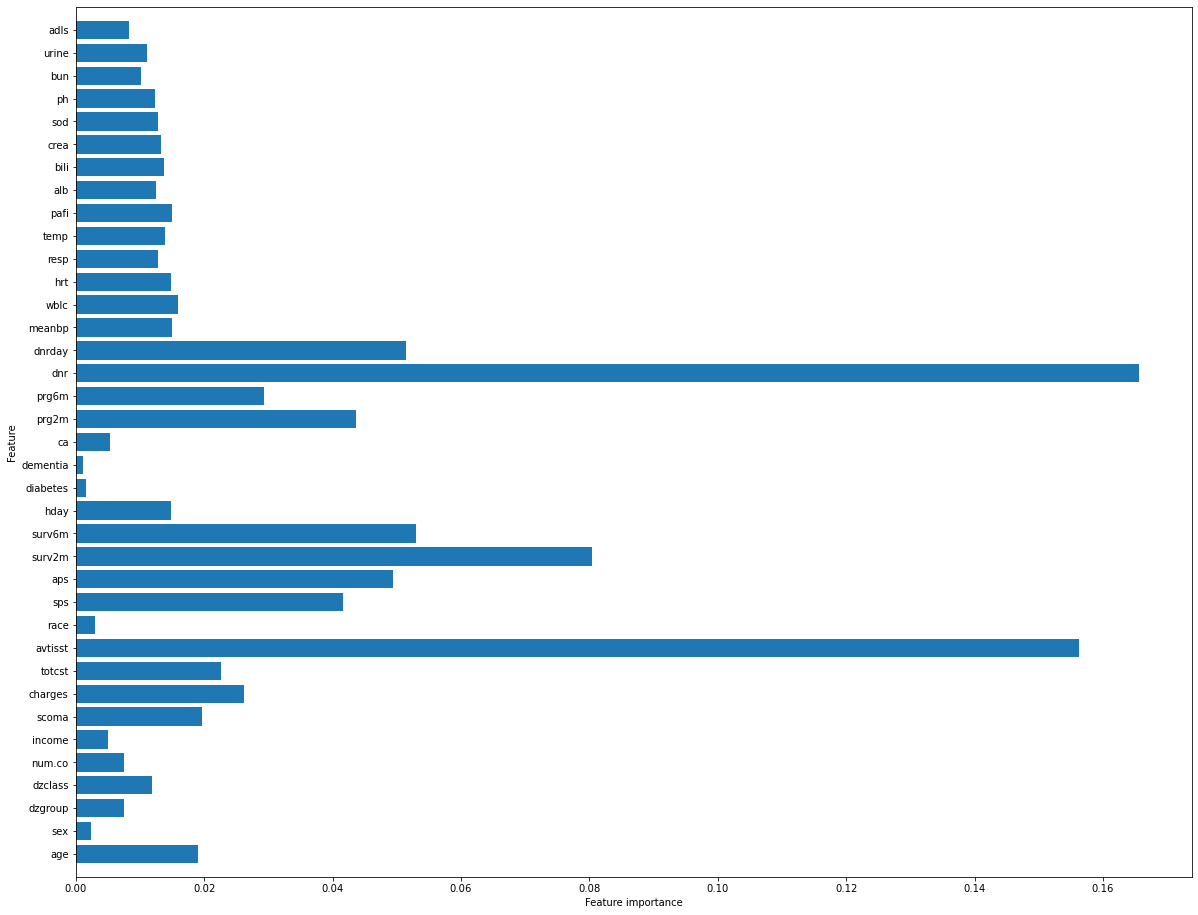

In [132]:
plot_feature_importances(model_2F)

## Part 3: Training a Logistics Regression Model.

In [97]:
scaled_X_train1=scaler.fit_transform(X_train1)
scaled_X_test1=scaler.fit_transform(X_test1)

model_3 = LogisticRegression()
model_3.fit(scaled_X_train1, y_train1)

print("Accuracy on training set: {:.5f}".format(model_3.score(scaled_X_train1, y_train1)))
print("Accuracy on test set: {:.5f}".format(model_3.score(scaled_X_test1, y_test1)))

Accuracy on training set: 0.88983
Accuracy on test set: 0.89061


### Tunning the C-hyperparameter to see if there is any relevant change.

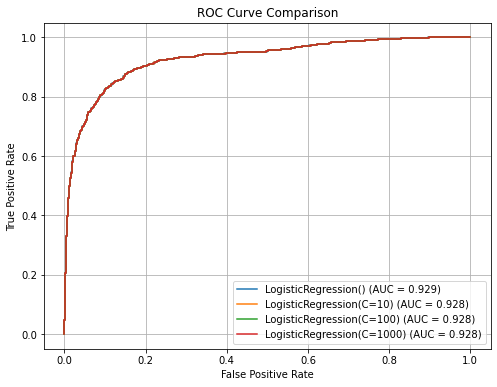

In [98]:
# C=10
model_3_1 = LogisticRegression(C=10)
model_3_1.fit(scaled_X_train1, y_train1)

# C=100
model_3_2 = LogisticRegression(C=100)
model_3_2.fit(scaled_X_train1, y_train1)

# C=1000
model_3_3 = LogisticRegression(C=1000)
model_3_3.fit(scaled_X_train1, y_train1)

clfs = [
    model_3,
    model_3_1,
    model_3_2,
    model_3_3
]

roc_curves = {}

for clf in clfs:
    model = clf
    y_probs = clf.predict_proba(scaled_X_test1)[:, 1]
    fpr, tpr, _ = roc_curve(y_test1, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_curves[model] = (fpr, tpr, roc_auc)


plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:0.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.title('ROC Curve Comparison')
plt.savefig('roc_comparison.png')

### The roc curve shows no impact of C-value on the models

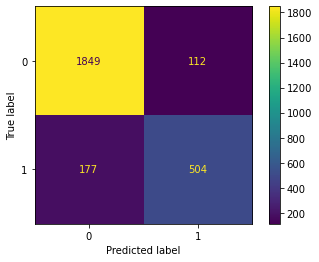

In [99]:
y_pred5 = model_3.predict(scaled_X_test1)
confusion = confusion_matrix(y_test1, y_pred5)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

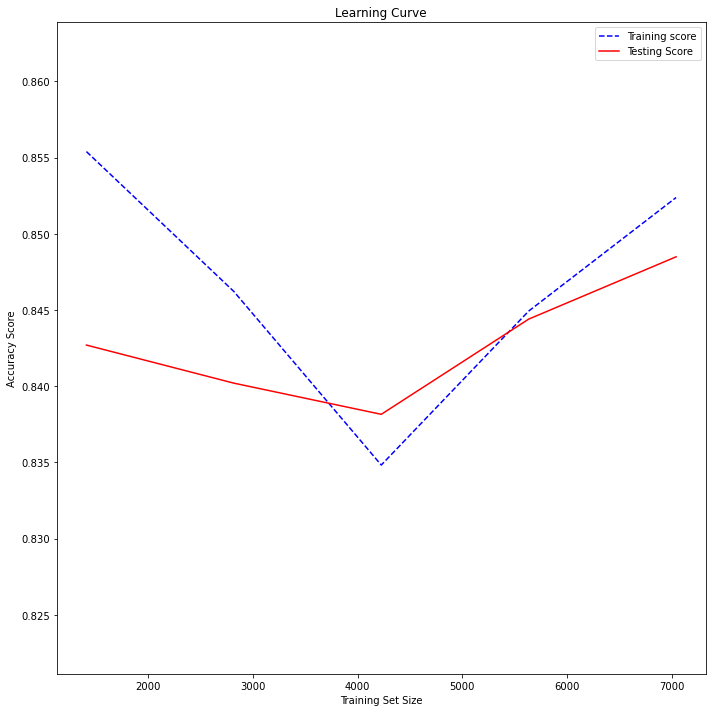

In [100]:
train_sizes, train_scores, test_scores =\
learning_curve(model_3, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [101]:
print(classification_report(y_test1, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1961
           1       0.82      0.74      0.78       681

    accuracy                           0.89      2642
   macro avg       0.87      0.84      0.85      2642
weighted avg       0.89      0.89      0.89      2642



## Part 4: Training an ensemble of Random Forest & Logistic Regression Models.

### Hard Voting after being trained on the standard scaled training data.

In [102]:
model_4 = RandomForestClassifier(n_estimators=est, max_depth=maxDepth)
model_5 = LogisticRegression()

voting_clf = VotingClassifier(estimators=[('rf', model_4), ('lr', model_5)], voting='hard')
voting_clf.fit(scaled_X_train1, y_train1)

y_pred6 = voting_clf.predict(scaled_X_test1)

print("The hard voting classifier ensemble's accuracy = ", accuracy_score(y_test1, y_pred6))

The hard voting classifier ensemble's accuracy =  0.8925056775170326


### The Random Forest model used in the ensemble is the model that got hyper-tuned earlier.

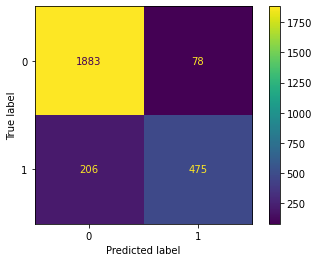

In [103]:
confusion = confusion_matrix(y_test1, y_pred6)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

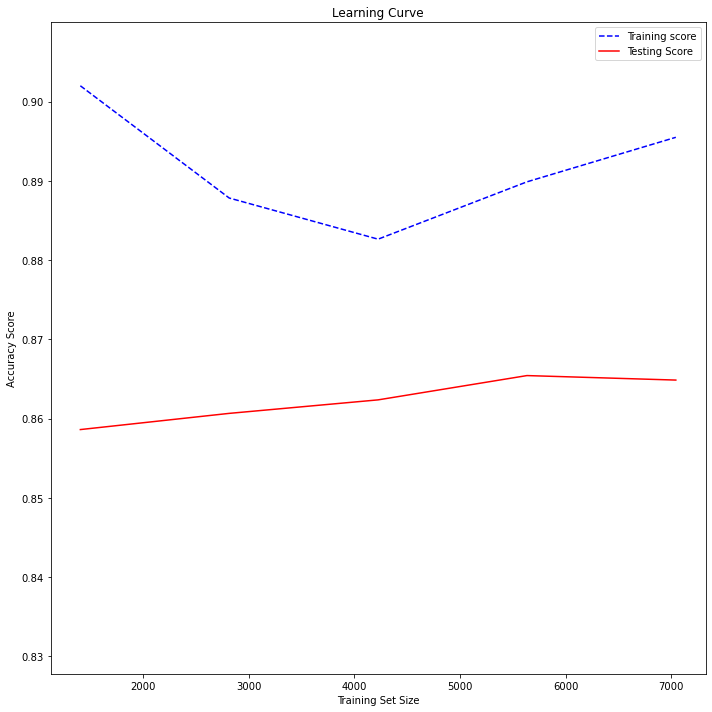

In [104]:
train_sizes, train_scores, test_scores =\
learning_curve(voting_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [105]:
print(classification_report(y_test1, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1961
           1       0.86      0.70      0.77       681

    accuracy                           0.89      2642
   macro avg       0.88      0.83      0.85      2642
weighted avg       0.89      0.89      0.89      2642



### The results show that the stand-alone RFC is better than being combined with LR in terms of overall accuracy and F1 score of class 1.

### Soft Voting.

In [106]:
voting_clf_2 = VotingClassifier(estimators=[('rf', model_4), ('lr', model_5)], voting='soft')
voting_clf_2.fit(scaled_X_train1, y_train1)

y_pred7 = voting_clf_2.predict(scaled_X_test1)

print("The soft voting classifier ensemble's accuracy = ", accuracy_score(y_test1, y_pred7))

The soft voting classifier ensemble's accuracy =  0.8936411809235427


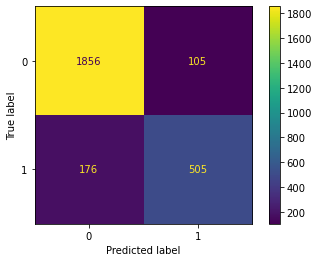

In [107]:
confusion = confusion_matrix(y_test1, y_pred7)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

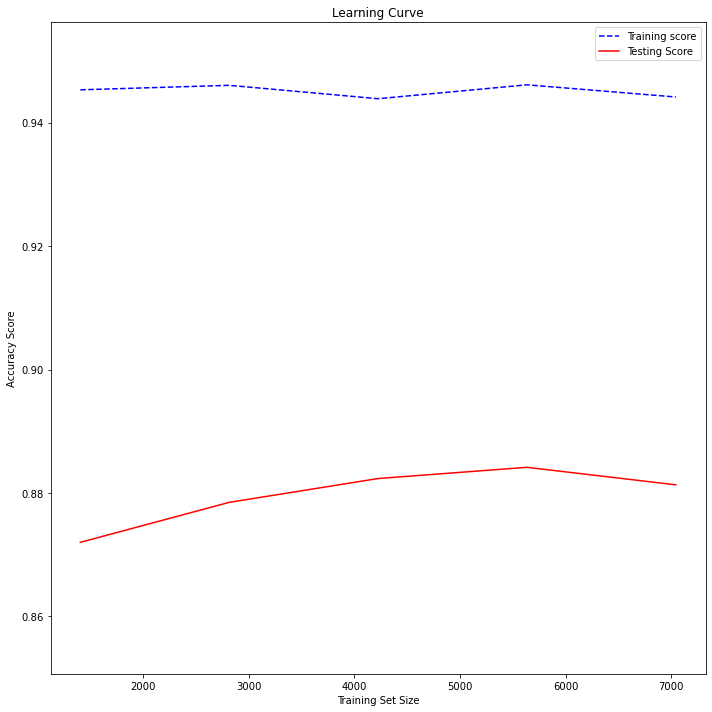

In [108]:
train_sizes, train_scores, test_scores =\
learning_curve(voting_clf_2, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [109]:
print(classification_report(y_test1, y_pred7))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1961
           1       0.83      0.74      0.78       681

    accuracy                           0.89      2642
   macro avg       0.87      0.84      0.86      2642
weighted avg       0.89      0.89      0.89      2642



### Random Forest Classifier stand-alone model still performs slightly better.

## Part 5: Training an ensemble of Support Vector Machine & Random Forest & Logistic Regression Model.

### Hard Voting.

In [110]:
model_6 = SVC(kernel='rbf')
model_7 = RandomForestClassifier(n_estimators=est, max_depth=maxDepth)
model_8 = LogisticRegression()

voting_clf_3 = VotingClassifier(estimators=[('svm', model_6), ('rf', model_7), ('lr', model_8)], voting='hard')
voting_clf_3.fit(scaled_X_train1, y_train1)

y_pred8 = voting_clf_3.predict(scaled_X_test1)

print("The hard voting classifier ensemble's accuracy = ", accuracy_score(y_test1, y_pred8))

The hard voting classifier ensemble's accuracy =  0.8974261922785768


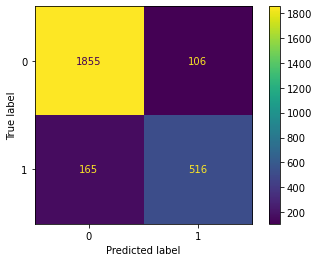

In [111]:
confusion = confusion_matrix(y_test1, y_pred8)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

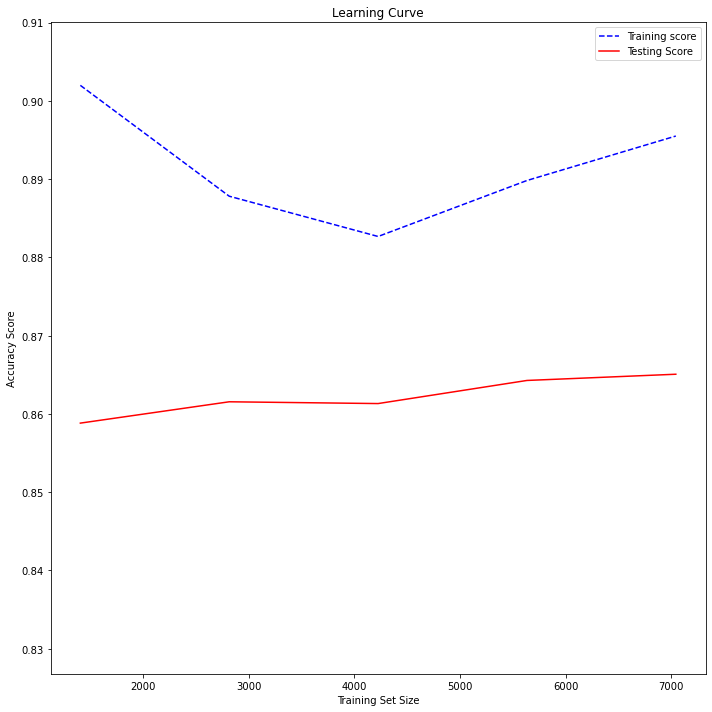

In [112]:
train_sizes, train_scores, test_scores =\
learning_curve(voting_clf_3, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [113]:
print(classification_report(y_test1, y_pred8))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1961
           1       0.83      0.76      0.79       681

    accuracy                           0.90      2642
   macro avg       0.87      0.85      0.86      2642
weighted avg       0.90      0.90      0.90      2642



### Adding an rbf-kernel SVM model to the hard-voting classifier increased the F1 score of class 1 by 0.01

## Part 6: Implementing a Decision Tree Model with Bagging and Bootstrapping.

### A stand-alone Decision Tree Model.

In [114]:
model_9 = DecisionTreeClassifier()
model_9.fit(X_train1, y_train1)
print("Accuracy on training set: {:.4f}".format(model_9.score(X_train1, y_train1)))
print("Accuracy on test set: {:.4f}".format(model_9.score(X_test1, y_test1)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.8531


### Hyperparemeters tunning.

In [115]:
trainScore=0
testScore=0
maxDepth=0
minSamples=0

for i in range(1,10):
    for j in range(2,10):
        model_9_1 = DecisionTreeClassifier(max_depth=i, min_samples_split =j, random_state=0)
        model_9_1.fit(X_train1, y_train1)
        trainScoreN= model_9_1.score(X_train1, y_train1)
        testScoreN= model_9_1.score(X_test1, y_test1)
        if (trainScoreN >= trainScore) & (testScoreN > testScore):
            trainScore=trainScoreN
            testScore=testScoreN
            maxDepth=i
            minSamples=j
            
print("Best Test score on max depth = " + str(maxDepth) + " and min samples = " + str(minSamples))

Best Test score on max depth = 5 and min samples = 2


### Fitting a model with max depth = 5 and min samples = 2

In [116]:
model_9_2 = DecisionTreeClassifier(max_depth=maxDepth, min_samples_split = minSamples, random_state=10)
model_9_2.fit(X_train1, y_train1)
trainScoreN= model_9_2.score(X_train1, y_train1)
testScoreN= model_9_2.score(X_test1, y_test1)

print("Accuracy on training set: {:.4f}".format(trainScoreN))
print("Accuracy on testing set: {:.4f}".format(testScoreN))

Accuracy on training set: 0.9101
Accuracy on testing set: 0.8876


Confusion Matrix of DT with customizing depth=5 and minimum samples split=2


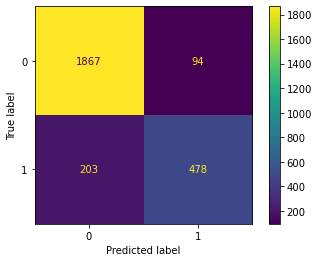

In [117]:
print(f"Confusion Matrix of DT with customizing depth={maxDepth} and minimum samples split={minSamples}")
y_pred9 = model_9_2.predict(X_test1)
confusion = confusion_matrix(y_test1, y_pred9)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

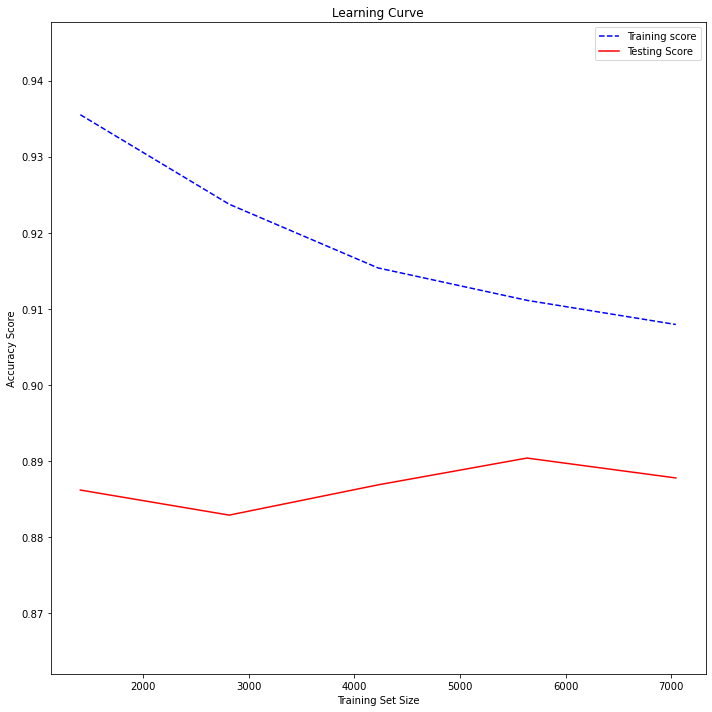

In [118]:
train_sizes, train_scores, test_scores =\
learning_curve(model_9_2, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [119]:
print(classification_report(y_test1, y_pred9))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1961
           1       0.84      0.70      0.76       681

    accuracy                           0.89      2642
   macro avg       0.87      0.83      0.84      2642
weighted avg       0.88      0.89      0.88      2642



### The RFC still has an edge over the decision tree model. Next we try bagging and boosting to see if the model can beat the RFC model.

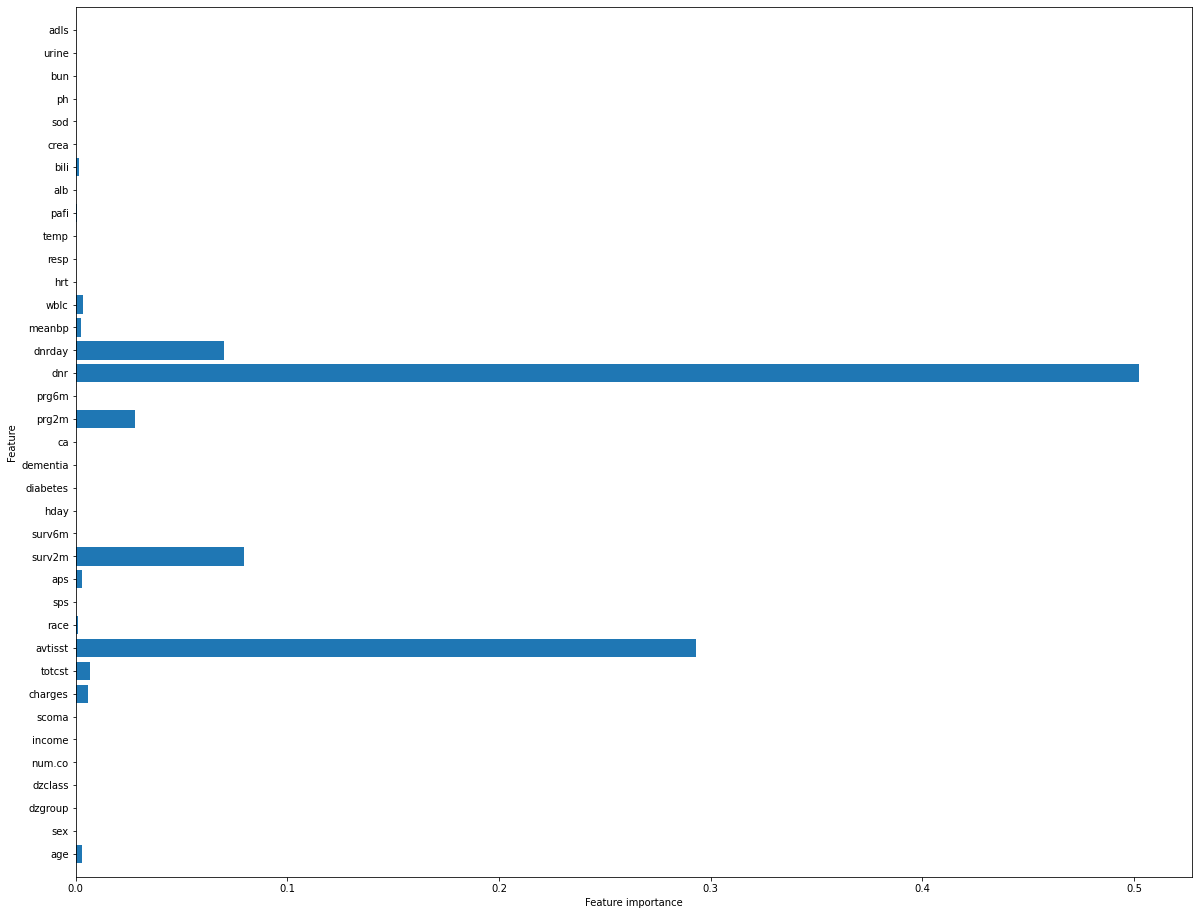

In [133]:
plot_feature_importances(model_9_2)

### Bagging with DT

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_10 = DecisionTreeClassifier(max_depth=maxDepth, min_samples_split = minSamples, random_state=10)

bag_clf = BaggingClassifier(base_estimator= model_10, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train1, y_train1)
y_pred10 = bag_clf.predict(X_test1)
print("Descision Tree (Bagging) = ",accuracy_score(y_test1, y_pred10))

Descision Tree (Bagging) =  0.8898561695685087


Confusion Matrix of our former DT model with Bagging.


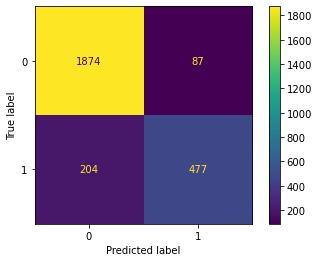

In [122]:
print(f"Confusion Matrix of our former DT model with Bagging.")

confusion = confusion_matrix(y_test1, y_pred10)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

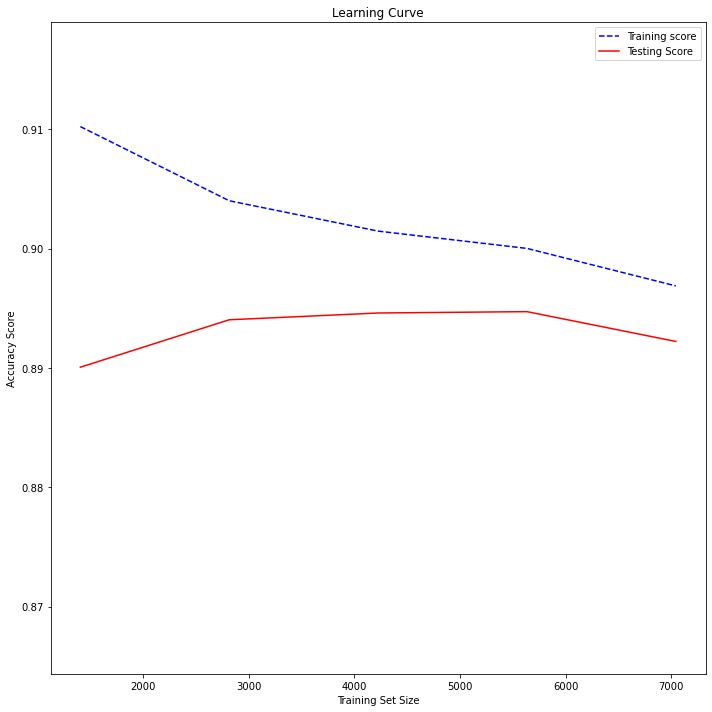

In [123]:
train_sizes, train_scores, test_scores =\
learning_curve(bag_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [125]:
print(classification_report(y_test1, y_pred10))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1961
           1       0.85      0.70      0.77       681

    accuracy                           0.89      2642
   macro avg       0.87      0.83      0.85      2642
weighted avg       0.89      0.89      0.89      2642



### Bagging increased the F1 score of the decision tree model by 0.01

### Boosting with DT

In [126]:
from sklearn.ensemble import AdaBoostClassifier

model_11 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxDepth), n_estimators=200, learning_rate=0.5, random_state=42)
model_11.fit(X_train1, y_train1)
y_pred11 = model_11.predict(X_test1)
print("Boosting with Decision Tree Acuuracy Score = ", accuracy_score(y_test1, y_pred11))

Boosting with Decision Tree Acuuracy Score =  0.8690386071158214


Confusion Matrix of our former DT model with Boosting.


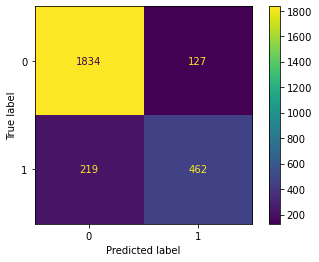

In [127]:
print(f"Confusion Matrix of our former DT model with Boosting.")
confusion = confusion_matrix(y_test1, y_pred11)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

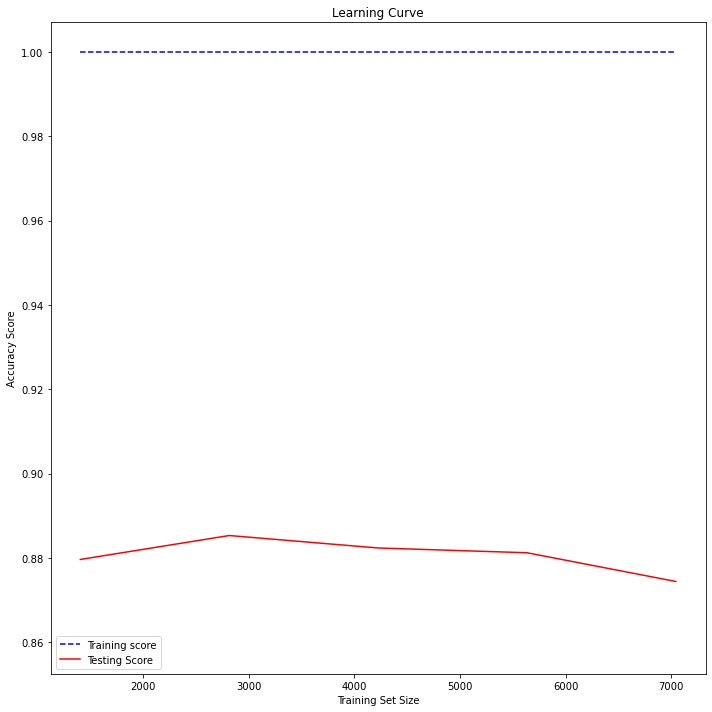

In [128]:
train_sizes, train_scores, test_scores =\
learning_curve(model_11, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Testing Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="white")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="white")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### The learning curve indicate that there maybe an overfit occurence with Adaboost.

In [129]:
print(classification_report(y_test1, y_pred11))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1961
           1       0.78      0.68      0.73       681

    accuracy                           0.87      2642
   macro avg       0.84      0.81      0.82      2642
weighted avg       0.87      0.87      0.87      2642



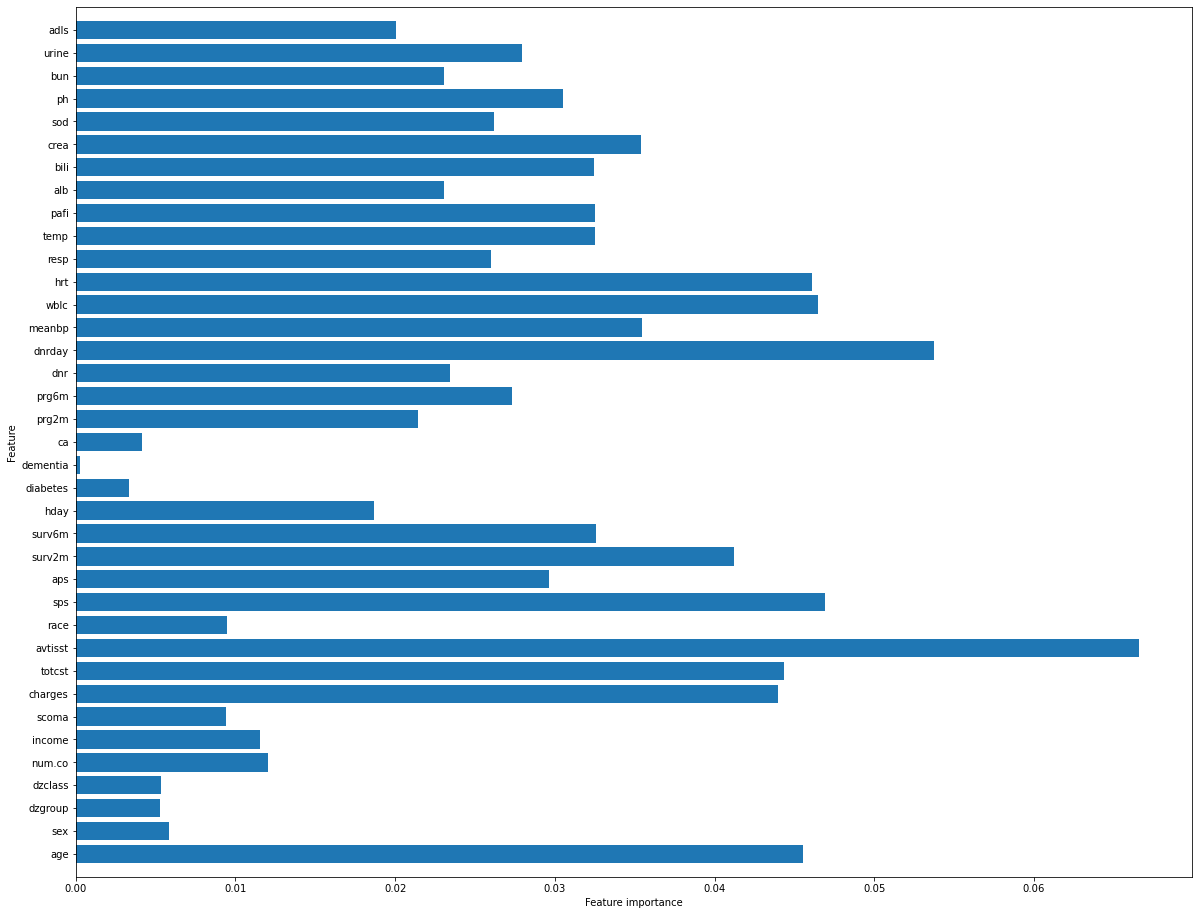

In [135]:
plot_feature_importances(model_11)

### Accuracy deteriorated with Adaboost and the F1 scores of both classes dropped.

## Final Comments:

## 1. The dataset is imbalanced as 75% of the records belong to one class.
## 2. The hyper-tuned Random Forest Model is best when it comes to accuracy and harmonic mean.
## 3. The stand-alone SVM model has the worst results and surprisingly, result deteriorates more with oversampling and using standard scaling.
## 4. The RFC model's performance decreases after being ensembled with Logistic Regression in both soft and hard voting classifiers.
## 5. In Hard Voting, adding the SVM model to RFC and LR gives better performance in terms of accuracy score and best recall of class 1 which is the second best recall score right after the rbf-kernel SVM model.
## 6. Adaboosting with decision tree comes right after SVM models having the worst overall accuracy, and F1 scores for both classes.
## 7. Models highlighted 'dnr' & 'avtisst' as the most important features. However, the final Adaboost model favored 'dnrday' over 'dnr'. While 'avtisst' remains the most important feature.
## 8. For future work: Linear Regression models could have been implemented to handle the missing data instead of dropping them.